In [126]:
import pandas as pd
import seaborn as sns
import mysql.connector
import numpy as np
import matplotlib.pyplot as plt
from mysql.connector import errorcode
from sklearn.cluster import KMeans

In [127]:
pd.set_option('display.max_columns', None)

In [128]:
config = {
  'host':'elecsimresults2.mysql.database.azure.com',
  'user':'alexkell@elecsimresults2',
  'password':'b3rz0s4m4dr1dth3h01113s!',
  'database':'carbonoptimiser',
  'ssl_ca':'/Users/b1017579/Documents/PhD/Projects/10-ELECSIM/run/validation-optimisation/database/BaltimoreCyberTrustRoot.crt.pem'
}

# conn = mysql.connector.connect(**config)


try:
    conn = mysql.connector.connect(**config)
    print("Connection established")
except mysql.connector.Error as err:
    if err.errno == errorcode.ER_ACCESS_DENIED_ERROR:
        print("Something is wrong with the user name or password")
    elif err.errno == errorcode.ER_BAD_DB_ERROR:
        print("Database does not exist")
    else:
        print(err)
else:
    cursor = conn.cursor()

Connection established


In [129]:
ga_results = pd.read_sql('SELECT * FROM carbon_results', con=conn)

# ga_results.to_csv('/Users/b1017579/Documents/PhD/Projects/10. ELECSIM/run/validation-optimisation/data/run_2.csv')


In [130]:
# ga_results = pd.to_numeric(ga_results)
ga_results = ga_results.apply(pd.to_numeric, errors='coerce', axis=1)
ga_results

id     reward  carbon_1    carbon_2    carbon_3    carbon_4  \
0      1.0   3.528399       0.0   55.460709   97.558929  194.555313   
1      2.0   3.909752       0.0   81.836662  140.055389  109.387558   
2      3.0   4.041183       0.0   63.487507   31.080025  128.128876   
3      4.0   4.105935       0.0   87.185364    9.465004  150.596222   
4      5.0   4.125593       0.0  133.796646   85.653061  167.208084   
..     ...        ...       ...         ...         ...         ...   
475  476.0   9.111672       0.0  180.145035   36.827976  153.498489   
476  477.0   9.215947       0.0   38.761539   29.260048  131.548981   
477  478.0   9.613738       0.0  181.133926   34.096581   33.778572   
478  479.0   9.866096       0.0   66.787064    4.011031   35.260731   
479  480.0  10.040091       0.0  203.593033    5.646075  201.556793   

       carbon_5    carbon_6    carbon_7    carbon_8    carbon_9   carbon_10  \
0    116.443214  131.035660   87.408691  114.904167   43.224018  211.694687   
1    111.572212  129.900543   67.574783  203.995300  235.098572  112.622192   
2    240.970993    2.796900   47.563957  239.360962  191.270660  156.320160   
3    223.533463  246.351395   92.155884  170.953369  160.831161  158.825363   
4    223.861740   66.753700  178.676743  126.811974  124.748901   95.527489   
..          ...         ...         ...         ...         ...         ...   
475  128.636887  152.287445  133.314392   27.651087  249.037048   91.271385   
476  224.855255  141.131897  184.083878  185.350235  154.146927  156.322739   
477  177.935349  129.364853   10.524505  198.135178   56.088600   71.342903   
478   39.252728  200.928238   10.904056   82.189629  183.927826   60.045181   
479   26.802229  194.284317   55.070812   81.923943   51.426529  114.717293   

      carbon_11   carbon_12   carbon_13   carbon_14   carbon_15   carbon_16  \
0    107.151993   75.628448  108.885406  190.665039  154.817429  186.837265   
1     73.598007  209.171738   34.468239    1.620905   80.043045  240.292191   
2    236.742386  108.194618  198.380173  204.618408  107.155197   44.997135   
3    140.214874  224.259460  174.462631  110.101860  178.639954  216.365311   
4    203.882523  223.557907  238.568451  242.487732  114.489937   12.894132   
..          ...         ...         ...         ...         ...         ...   
475   86.404282  103.796310  124.660019   20.394230  179.670761   68.602249   
476  235.739777   99.727509  176.401672  205.578552  107.155197  220.014587   
477  195.556198  244.510620  180.957764  235.135056   42.847569  153.283447   
478  166.722809  104.392281  148.023117   72.884972  249.100555  175.022705   
479  105.309959  249.146271  147.835114  171.858871  239.526016  231.320786   

      carbon_17   carbon_18  
0    143.341537  115.356789  
1    171.498672  106.009079  
2    140.356613  191.222168  
3    212.959366  217.569550  
4     47.457134  188.238541  
..          ...         ...  
475  206.383667   56.141106  
476  212.963486  218.130707  
477   78.467545   90.414299  
478  136.902191    6.443376  
479  241.265182  237.185883  

[480 rows x 20 columns]

In [131]:
ga_results['run_number'] = np.repeat([1,2,3,4],120)
ga_results

id     reward  carbon_1    carbon_2    carbon_3    carbon_4  \
0      1.0   3.528399       0.0   55.460709   97.558929  194.555313   
1      2.0   3.909752       0.0   81.836662  140.055389  109.387558   
2      3.0   4.041183       0.0   63.487507   31.080025  128.128876   
3      4.0   4.105935       0.0   87.185364    9.465004  150.596222   
4      5.0   4.125593       0.0  133.796646   85.653061  167.208084   
..     ...        ...       ...         ...         ...         ...   
475  476.0   9.111672       0.0  180.145035   36.827976  153.498489   
476  477.0   9.215947       0.0   38.761539   29.260048  131.548981   
477  478.0   9.613738       0.0  181.133926   34.096581   33.778572   
478  479.0   9.866096       0.0   66.787064    4.011031   35.260731   
479  480.0  10.040091       0.0  203.593033    5.646075  201.556793   

       carbon_5    carbon_6    carbon_7    carbon_8    carbon_9   carbon_10  \
0    116.443214  131.035660   87.408691  114.904167   43.224018  211.694687   
1    111.572212  129.900543   67.574783  203.995300  235.098572  112.622192   
2    240.970993    2.796900   47.563957  239.360962  191.270660  156.320160   
3    223.533463  246.351395   92.155884  170.953369  160.831161  158.825363   
4    223.861740   66.753700  178.676743  126.811974  124.748901   95.527489   
..          ...         ...         ...         ...         ...         ...   
475  128.636887  152.287445  133.314392   27.651087  249.037048   91.271385   
476  224.855255  141.131897  184.083878  185.350235  154.146927  156.322739   
477  177.935349  129.364853   10.524505  198.135178   56.088600   71.342903   
478   39.252728  200.928238   10.904056   82.189629  183.927826   60.045181   
479   26.802229  194.284317   55.070812   81.923943   51.426529  114.717293   

      carbon_11   carbon_12   carbon_13   carbon_14   carbon_15   carbon_16  \
0    107.151993   75.628448  108.885406  190.665039  154.817429  186.837265   
1     73.598007  209.171738   34.468239    1.620905   80.043045  240.292191   
2    236.742386  108.194618  198.380173  204.618408  107.155197   44.997135   
3    140.214874  224.259460  174.462631  110.101860  178.639954  216.365311   
4    203.882523  223.557907  238.568451  242.487732  114.489937   12.894132   
..          ...         ...         ...         ...         ...         ...   
475   86.404282  103.796310  124.660019   20.394230  179.670761   68.602249   
476  235.739777   99.727509  176.401672  205.578552  107.155197  220.014587   
477  195.556198  244.510620  180.957764  235.135056   42.847569  153.283447   
478  166.722809  104.392281  148.023117   72.884972  249.100555  175.022705   
479  105.309959  249.146271  147.835114  171.858871  239.526016  231.320786   

      carbon_17   carbon_18  run_number  
0    143.341537  115.356789           1  
1    171.498672  106.009079           1  
2    140.356613  191.222168           1  
3    212.959366  217.569550           1  
4     47.457134  188.238541           1  
..          ...         ...         ...  
475  206.383667   56.141106           4  
476  212.963486  218.130707           4  
477   78.467545   90.414299           4  
478  136.902191    6.443376           4  
479  241.265182  237.185883           4  

[480 rows x 21 columns]

In [132]:
ga_results.to_csv('/Users/b1017579/Documents/PhD/Projects/10-ELECSIM/run/carbon_tax_optimiser/data/carbon_optimiser_ga.csv')



In [91]:
results_mod = ga_results.rename({'reward':'average_electricity_price', 'carbon_1':'carbon_emitted'}, axis=1)
results_mod

id  average_electricity_price  carbon_emitted    carbon_2    carbon_3  \
0      1.0                   3.528399             0.0   55.460709   97.558929   
1      2.0                   3.909752             0.0   81.836662  140.055389   
2      3.0                   4.041183             0.0   63.487507   31.080025   
3      4.0                   4.105935             0.0   87.185364    9.465004   
4      5.0                   4.125593             0.0  133.796646   85.653061   
..     ...                        ...             ...         ...         ...   
475  476.0                   9.111672             0.0  180.145035   36.827976   
476  477.0                   9.215947             0.0   38.761539   29.260048   
477  478.0                   9.613738             0.0  181.133926   34.096581   
478  479.0                   9.866096             0.0   66.787064    4.011031   
479  480.0                  10.040091             0.0  203.593033    5.646075   

       carbon_4    carbon_5    carbon_6    carbon_7    carbon_8    carbon_9  \
0    194.555313  116.443214  131.035660   87.408691  114.904167   43.224018   
1    109.387558  111.572212  129.900543   67.574783  203.995300  235.098572   
2    128.128876  240.970993    2.796900   47.563957  239.360962  191.270660   
3    150.596222  223.533463  246.351395   92.155884  170.953369  160.831161   
4    167.208084  223.861740   66.753700  178.676743  126.811974  124.748901   
..          ...         ...         ...         ...         ...         ...   
475  153.498489  128.636887  152.287445  133.314392   27.651087  249.037048   
476  131.548981  224.855255  141.131897  184.083878  185.350235  154.146927   
477   33.778572  177.935349  129.364853   10.524505  198.135178   56.088600   
478   35.260731   39.252728  200.928238   10.904056   82.189629  183.927826   
479  201.556793   26.802229  194.284317   55.070812   81.923943   51.426529   

      carbon_10   carbon_11   carbon_12   carbon_13   carbon_14   carbon_15  \
0    211.694687  107.151993   75.628448  108.885406  190.665039  154.817429   
1    112.622192   73.598007  209.171738   34.468239    1.620905   80.043045   
2    156.320160  236.742386  108.194618  198.380173  204.618408  107.155197   
3    158.825363  140.214874  224.259460  174.462631  110.101860  178.639954   
4     95.527489  203.882523  223.557907  238.568451  242.487732  114.489937   
..          ...         ...         ...         ...         ...         ...   
475   91.271385   86.404282  103.796310  124.660019   20.394230  179.670761   
476  156.322739  235.739777   99.727509  176.401672  205.578552  107.155197   
477   71.342903  195.556198  244.510620  180.957764  235.135056   42.847569   
478   60.045181  166.722809  104.392281  148.023117   72.884972  249.100555   
479  114.717293  105.309959  249.146271  147.835114  171.858871  239.526016   

      carbon_16   carbon_17   carbon_18  run_number  
0    186.837265  143.341537  115.356789           1  
1    240.292191  171.498672  106.009079           1  
2     44.997135  140.356613  191.222168           1  
3    216.365311  212.959366  217.569550           1  
4     12.894132   47.457134  188.238541           1  
..          ...         ...         ...         ...  
475   68.602249  206.383667   56.141106           4  
476  220.014587  212.963486  218.130707           4  
477  153.283447   78.467545   90.414299           4  
478  175.022705  136.902191    6.443376           4  
479  231.320786  241.265182  237.185883           4  

[480 rows x 21 columns]

In [92]:
results_mod = results_mod.drop_duplicates(subset=[col for col in results_mod if col.startswith('carbon_')][1:])


In [93]:
results_mod

id  average_electricity_price  carbon_emitted    carbon_2    carbon_3  \
0      1.0                   3.528399             0.0   55.460709   97.558929   
1      2.0                   3.909752             0.0   81.836662  140.055389   
2      3.0                   4.041183             0.0   63.487507   31.080025   
3      4.0                   4.105935             0.0   87.185364    9.465004   
4      5.0                   4.125593             0.0  133.796646   85.653061   
..     ...                        ...             ...         ...         ...   
453  454.0                   7.751792             0.0   74.806961  133.755341   
472  473.0                   8.897662             0.0  180.145035    6.581522   
476  477.0                   9.215947             0.0   38.761539   29.260048   
477  478.0                   9.613738             0.0  181.133926   34.096581   
479  480.0                  10.040091             0.0  203.593033    5.646075   

       carbon_4    carbon_5    carbon_6    carbon_7    carbon_8    carbon_9  \
0    194.555313  116.443214  131.035660   87.408691  114.904167   43.224018   
1    109.387558  111.572212  129.900543   67.574783  203.995300  235.098572   
2    128.128876  240.970993    2.796900   47.563957  239.360962  191.270660   
3    150.596222  223.533463  246.351395   92.155884  170.953369  160.831161   
4    167.208084  223.861740   66.753700  178.676743  126.811974  124.748901   
..          ...         ...         ...         ...         ...         ...   
453   71.805153  123.402336   11.463609  233.631027    1.138418   44.614964   
472  154.932999  136.881683  122.667862  133.314392   78.884377  247.331161   
476  131.548981  224.855255  141.131897  184.083878  185.350235  154.146927   
477   33.778572  177.935349  129.364853   10.524505  198.135178   56.088600   
479  201.556793   26.802229  194.284317   55.070812   81.923943   51.426529   

      carbon_10   carbon_11   carbon_12   carbon_13   carbon_14   carbon_15  \
0    211.694687  107.151993   75.628448  108.885406  190.665039  154.817429   
1    112.622192   73.598007  209.171738   34.468239    1.620905   80.043045   
2    156.320160  236.742386  108.194618  198.380173  204.618408  107.155197   
3    158.825363  140.214874  224.259460  174.462631  110.101860  178.639954   
4     95.527489  203.882523  223.557907  238.568451  242.487732  114.489937   
..          ...         ...         ...         ...         ...         ...   
453   90.190468  243.894821   42.739861  189.939758  106.510208  155.197037   
472   89.918564  109.460915   78.561790  124.660019   26.522934  179.226761   
476  156.322739  235.739777   99.727509  176.401672  205.578552  107.155197   
477   71.342903  195.556198  244.510620  180.957764  235.135056   42.847569   
479  114.717293  105.309959  249.146271  147.835114  171.858871  239.526016   

      carbon_16   carbon_17   carbon_18  run_number  
0    186.837265  143.341537  115.356789           1  
1    240.292191  171.498672  106.009079           1  
2     44.997135  140.356613  191.222168           1  
3    216.365311  212.959366  217.569550           1  
4     12.894132   47.457134  188.238541           1  
..          ...         ...         ...         ...  
453   11.271973   45.357075  215.839920           4  
472  164.184601  207.501312  198.600540           4  
476  220.014587  212.963486  218.130707           4  
477  153.283447   78.467545   90.414299           4  
479  231.320786  241.265182  237.185883           4  

[160 rows x 21 columns]

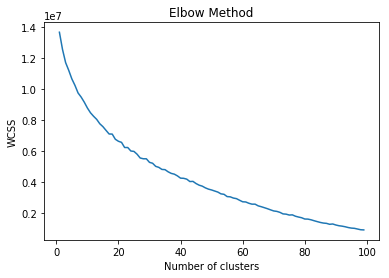

In [94]:
wcss = []
max_clusters = 100
for i in range(1, max_clusters):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(results_mod.iloc[:,3:-1])
    wcss.append(kmeans.inertia_)
plt.plot(range(1, max_clusters), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [95]:
kmeans = KMeans(n_clusters=40, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(results_mod.iloc[:,3:-1])

kmeans_results = results_mod.copy()
kmeans_results['kmeans'] = pred_y
kmeans_results['addition'] = kmeans_results['average_electricity_price'] + kmeans_results['carbon_emitted']

In [96]:
# kmeans_results.kmeans

len(kmeans_results[kmeans_results.kmeans.duplicated(keep=False)])

157

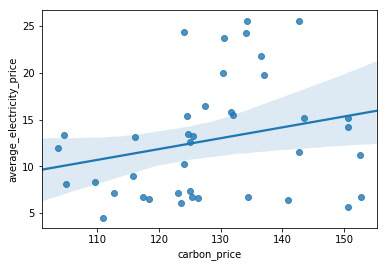

In [97]:
kmeans_results_long = kmeans_results.melt(value_name='carbon_price', id_vars=['id','average_electricity_price','carbon_emitted','kmeans'], value_vars=[col for col in results_mod if col.startswith('carbon_')][1:])
kmeans_avg = kmeans_results_long.groupby("kmeans")[['carbon_price','average_electricity_price','carbon_emitted']].mean()

kmeans_avg['combined'] = kmeans_avg['average_electricity_price'] + kmeans_avg['carbon_emitted']
sns.regplot(data=kmeans_avg, y='average_electricity_price', x='carbon_price')

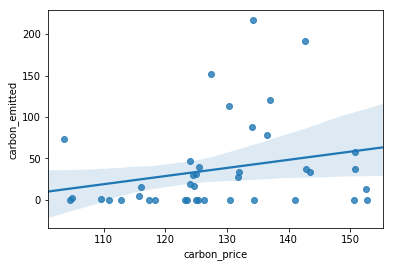

In [98]:
sns.regplot(data=kmeans_avg, y='carbon_emitted', x='carbon_price')

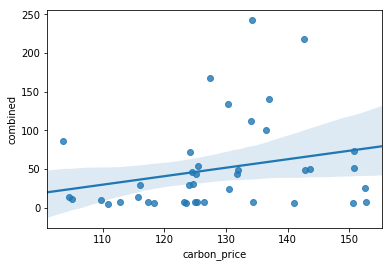

In [99]:
sns.regplot(data=kmeans_avg, y='combined', x='carbon_price')

In [100]:
kmeans_describe = kmeans_results_long.groupby("kmeans")[['carbon_price','average_electricity_price','carbon_emitted']].describe()
# sns.lineplot(data=kmeans_describe, y='carbon_price', x='average_electricity_price')
kmeans_describe

carbon_price                                                            \
              count        mean        std        min         25%         50%   
kmeans                                                                          
0              68.0  150.571979  70.048162   2.796900  105.789682  156.320160   
1             119.0  152.678468  72.027288   4.041417   95.715309  171.858871   
2             119.0  123.502131  64.528369   6.552192   80.253838  113.895721   
3             119.0  124.085934  62.958129   4.075459   80.501259  124.660019   
4              85.0  130.345090  60.508794   7.342966   82.413788  138.042221   
5              68.0  118.385517  72.951495   7.539859   52.568238  114.738873   
6              34.0  109.650272  78.027294   5.642202   27.481386  132.266113   
7              68.0  117.361759  70.068792   5.041587   57.252703  113.126316   
8             119.0  124.989401  75.332766   0.037002   71.342903  107.668091   
9             102.0  124.647392  71.726141   3.652080   69.281357  122.197365   
10             34.0  134.249217  70.469430  11.023003   84.684885  118.587307   
11             34.0  131.736600  83.756701   4.752220   34.594189  170.084557   
12             68.0  150.699601  62.492822  14.093628  105.444559  150.424789   
13            102.0  115.712870  67.531797   5.463437   59.847442  115.360954   
14             85.0  152.539875  61.332746   4.703574  108.102158  160.443466   
15             85.0  125.054249  73.846860   1.138418   63.494354  131.571884   
16             85.0  103.601893  69.671711   3.146222   49.782009   87.411041   
17            136.0  104.523517  70.234755   1.036646   49.694356   97.594803   
18             51.0  112.744178  74.560915   2.314526   38.828987  111.460213   
19             68.0  126.351805  81.668628   3.013596   46.109365  127.477005   
20            187.0  104.954313  63.680826   0.251255   53.112116   96.797386   
21             68.0  124.489964  76.571084   4.355389   54.289774  128.514797   
22             17.0  142.666164  86.102815   5.117489   89.194023  176.128830   
23             51.0  123.130381  75.685093   1.292622   56.819220  125.529503   
24             51.0  125.444507  72.569060  14.309246   60.479794  109.878021   
25             68.0  124.036815  66.780157   1.620905   73.473196  110.699066   
26             34.0  116.124355  83.072184  10.618968   17.294842  120.790188   
27             34.0  125.337982  84.628311   9.028936   58.874790   98.053329   
28             34.0  131.987722  73.047832   5.083419   82.491997  124.098763   
29             51.0  150.675748  70.092809   5.738347   87.301754  158.422714   
30             68.0  143.527012  73.933269   7.697445   78.278603  151.290764   
31             34.0  136.531583  79.779342   9.053652   76.967979  127.958645   
32             51.0  130.543144  69.661032   6.581522   78.703213  133.864578   
33             34.0  136.981501  74.497410   5.154203   66.241077  145.471764   
34             34.0  134.354759  72.518736   3.321032   81.980808  116.116390   
35             17.0  134.100140  86.577704   1.244191   44.919487  128.943573   
36             68.0  142.733914  71.238253   0.311432   85.416616  138.561623   
37             17.0  110.931797  84.475049  10.677539   25.761223  106.068825   
38             51.0  140.947878  71.260821   0.213867   71.590847  158.401917   
39            102.0  127.370842  65.674945   6.642238   74.386271  119.490978   

                               average_electricity_price             \
               75%         max                     count       mean   
kmeans                                                                
0       207.424786  246.416611                      68.0   5.662001   
1       216.365311  249.146271                     119.0   6.685138   
2       172.154678  249.324356                     119.0   6.095297   
3       164.705879  249.037048                     119.0  24.377272   
4       172.052750  241.81

In [101]:
kmeans_describe.columns = ['_'.join(col).strip() for col in kmeans_describe.columns.values]
kmeans_describe.head()

carbon_price_count  carbon_price_mean  carbon_price_std  \
kmeans                                                            
0                     68.0         150.571979         70.048162   
1                    119.0         152.678468         72.027288   
2                    119.0         123.502131         64.528369   
3                    119.0         124.085934         62.958129   
4                     85.0         130.345090         60.508794   

        carbon_price_min  carbon_price_25%  carbon_price_50%  \
kmeans                                                         
0               2.796900        105.789682        156.320160   
1               4.041417         95.715309        171.858871   
2               6.552192         80.253838        113.895721   
3               4.075459         80.501259        124.660019   
4               7.342966         82.413788        138.042221   

        carbon_price_75%  carbon_price_max  average_electricity_price_count  \
kmeans                                                                        
0             207.424786        246.416611                             68.0   
1             216.365311        249.146271                            119.0   
2             172.154678        249.324356                            119.0   
3             164.705879        249.037048                            119.0   
4             172.052750        241.811096                             85.0   

        average_electricity_price_mean  average_electricity_price_std  \
kmeans                                                                  
0                             5.662001                       2.123724   
1                             6.685138                       2.000474   
2                             6.095297                       1.607728   
3                            24.377272                      29.037044   
4                            20.018226                       7.445888   

        average_electricity_price_min  average_electricity_price_25%  \
kmeans                                                                 
0                            4.041183                       4.104490   
1                            4.105935                       4.359230   
2                            3.528399                       5.142792   
3                            4.204944                       6.752700   
4                            5.303285                      22.250440   

        average_electricity_price_50%  average_electricity_price_75%  \
kmeans                                                                 
0                            4.695438                       6.252949   
1                            6.447614                       8.579289   
2                            5.651115                       7.352586   
3                            9.111672                      26.247860   
4                           23.775201                      24.028626   

        average_electricity_price_max  carbon_emitted_count  \
kmeans                                                        
0                            9.215947                  68.0   
1                           10.040091                 119.0   
2                            8.699091                 119.0   
3                           92.614339                 119.0   
4                           24.733576                  85.0   

        carbon_emitted_mean  carbon_emitted_std  carbon_emitted_min  \
kmeans                                                                
0                  0.000000            0.000000                 0.0   
1                  0.000000            0.000000                 0.0   
2                  0.000000            0.000000                 0.0   
3                 47.005768           95.636322                 0.0   
4                113.637564          110.732004                 0.0   

        carbon_emitted_25%  carbon_emitted_50%  carbon_emitted_75%  \
kme

In [102]:
# for cols in kmeans_describe.columns:
#     for dependent_var in ['carbon_price_mean','carbon_price_std','carbon_price_min','carbon_price_25%','carbon_price_50%','carbon_price_75%','carbon_price_max']:
#         sns.regplot(lowess=False, robust=True, data=kmeans_describe, x=dependent_var, y=cols)
#         plt.show()
#         plt.close()

In [103]:
# kmeans_described_long = kmeans_describe.melt(id_vars=['carbon_price_mean'], value_vars=['average_electricity_price_mean','average_electricity_price_min'])
# kmeans_described_long
# sns.scatterplot(data=kmeans_described_long, hue='variable',y='value',x='carbon_price_mean')

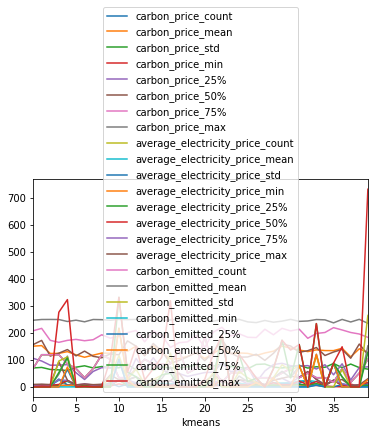

In [104]:
kmeans_describe.plot()

In [105]:
pd.set_option('display.max_columns', None)

kmeans_results.groupby('kmeans').describe()

id                                                               \
       count        mean         std    min     25%    50%     75%    max   
kmeans                                                                      
0        4.0  157.250000  223.150734    3.0    4.50   74.5  227.25  477.0   
1        7.0  245.714286  168.452480    4.0  140.00  249.0  353.50  480.0   
2        7.0   61.857143   74.508229    1.0   22.50   29.0   68.50  221.0   
3        7.0  225.428571  170.491307    7.0  103.50  181.0  355.00  473.0   
4        5.0   85.400000   34.551411   24.0   95.00  100.0  102.00  106.0   
5        4.0   84.000000   78.004273   33.0   42.00   51.5   93.50  200.0   
6        2.0   63.000000   36.769553   37.0   50.00   63.0   76.00   89.0   
7        4.0   87.250000   62.909326   36.0   48.75   68.0  106.50  177.0   
8        7.0  210.285714  182.981524   11.0   43.00  219.0  339.00  478.0   
9        6.0  115.833333   74.520914   40.0   61.75   92.5  170.50  222.0   
10       2.0  110.000000    8.485281  104.0  107.00  110.0  113.00  116.0   
11       2.0  141.000000  140.007143   42.0   91.50  141.0  190.50  240.0   
12       4.0  128.000000   99.085821   48.0   68.25   97.0  156.75  270.0   
13       6.0  105.000000   85.052925   15.0   55.50   72.5  160.00  231.0   
14       5.0  111.600000  104.991904   19.0   56.00   88.0  105.00  290.0   
15       5.0  140.600000  178.759056   13.0   44.00   94.0   98.00  454.0   
16       5.0   79.000000   94.902582    6.0   20.00   31.0  103.00  235.0   
17       8.0  153.750000  137.639021   16.0   66.25   83.0  255.50  355.0   
18       3.0   60.000000   37.403208   17.0   47.50   78.0   81.50   85.0   
19       4.0  115.000000  147.442644   30.0   31.50   47.5  131.00  335.0   
20      11.0   60.818182   18.941057   34.0   46.50   62.0   67.50   92.0   
21       4.0   87.000000   87.449033    8.0   23.00   70.5  134.50  199.0   
22       1.0  107.000000         NaN  107.0  107.00  107.0  107.00  107.0   
23       3.0  103.333333   89.612127   27.0   54.00   81.0  141.50  202.0   
24       3.0   73.333333   30.287511   52.0   56.00   60.0   84.00  108.0   
25       4.0  124.250000  148.939305    2.0   44.75   77.5  157.00  340.0   
26       2.0   86.500000    9.192388   80.0   83.25   86.5   89.75   93.0   
27       2.0   51.500000   36.062446   26.0   38.75   51.5   64.25   77.0   
28       2.0   77.500000   33.234019   54.0   65.75   77.5   89.25  101.0   
29       3.0  204.333333  212.113963   49.0   83.50  118.0  282.00  446.0   
30       4.0  106.000000   74.592225   21.0   70.50  101.0  136.50  201.0   
31       2.0  165.000000   67.882251  117.0  141.00  165.0  189.00  213.0   
32       3.0  247.333333  190.484470   69.0  147.00  225.0  336.50  448.0   
33       2.0  105.500000   20.506097   91.0   98.25  105.5  112.75  120.0   
34       2.0   52.000000   38.183766   25.0   38.50   52.0   65.50   79.0   
35       1.0   99.000000         NaN   99.0   99.00   99.0   99.00   99.0   
36       4.0   94.750000   61.190277   39.0   51.00   83.0  126.75  174.0   
37       1.0   10.000000         NaN   10.0   10.00   10.0   10.00   10.0   
38       3.0   49.666667   30.892286   14.0   40.50   67.0   67.50   68.0   
39       6.0   89.166667   85.590693   12.0   23.75   76.5  113.50  238.0   

       average_electricity_price                                              \
                           count       mean        std        min        25%   
kmeans                                                                         
0                            4.0   5.662001   2.434168   4.041183   4.104490   
1                            7.0   6.685138   2.151660   4.105935   5.177346   
2                            7.0   6.095297   1.729233   3.528399   5.159622   
3                            7.0  24.377272  31.231535   4.204944   7.825181   
4                            5.0  20.018226   8.275641   5.303285  22.250440   
5                            4.0   6.529599   0.815596   5

In [106]:
cluster_dat = kmeans_results.groupby('kmeans')[['average_electricity_price','carbon_emitted']].median()
cluster_dat['addition'] = cluster_dat.average_electricity_price + cluster_dat.carbon_emitted
cluster_dat.sort_values('addition')

average_electricity_price  carbon_emitted    addition
kmeans                                                       
37                       4.497471        0.000000    4.497471
0                        4.695438        0.000000    4.695438
2                        5.651115        0.000000    5.651115
16                       5.673331        0.000000    5.673331
19                       6.292337        0.000000    6.292337
5                        6.429343        0.000000    6.429343
7                        6.433941        0.000000    6.433941
1                        6.447614        0.000000    6.447614
36                       6.506432        0.000000    6.506432
21                       6.596878        0.000000    6.596878
14                       6.685415        0.000000    6.685415
27                       6.723173        0.000000    6.723173
34                       6.748470        0.000000    6.748470
24                       6.828566        0.000000    6.828566
20                       6.901496        0.000000    6.901496
12                       7.006482        0.000000    7.006482
38                       7.156151        0.000000    7.156151
13                       7.331492        0.000000    7.331492
9                        7.478122        0.000000    7.478122
25                       7.577943        0.000000    7.577943
29                       7.631643        0.000000    7.631643
32                       7.652561        0.000000    7.652561
23                       7.668714        0.000000    7.668714
8                        7.709199        0.000000    7.709199
15                       7.751792        0.000000    7.751792
18                       8.037814        0.000000    8.037814
30                       8.153676        0.000000    8.153676
17                       8.402521        0.000000    8.402521
3                        9.111672        0.000000    9.111672
6                        8.366407        0.787802    9.154210
26                      13.191760       16.018648   29.210408
39                      16.143492       26.239668   42.383160
11                      15.840224       27.254211   43.094435
28                      15.525712       33.619156   49.144868
4                       23.775201       73.672997   97.448198
31                      21.862660       78.305740  100.168400
35                      24.244416       87.708664  111.953080
33                      19.823973      120.397781  140.221754
22                      25.551261      192.198776  217.750038
10                      25.606955      216.626896  242.233851

        average_electricity_price  carbon_emitted  addition
kmeans                                                     
0                        4.695438             0.0  4.695438
               id  average_electricity_price  carbon_emitted       value  \
count   68.000000                  68.000000            68.0   68.000000   
mean   157.250000                   5.662001             0.0  150.571979   
std    194.691058                   2.123724             0.0   70.048162   
min      3.000000                   4.041183             0.0    2.796900   
25%      4.500000                   4.104490             0.0  105.789682   
50%     74.500000                   4.695438             0.0  156.320160   
75%    227.250000                   6.252949             0.0  207.424786   
max    477.000000                   9.215947             0.0  246.416611   

          number  
count  68.000000  
mean   10.000000  
std     4.935404  
min     2.000000  
25%     6.000000  
50%    10.000000  
75

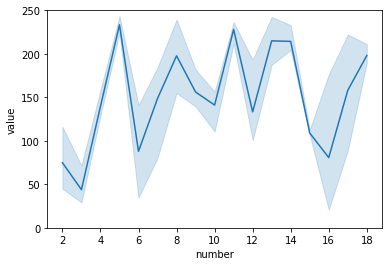

        average_electricity_price  carbon_emitted  addition
kmeans                                                     
2                        5.651115             0.0  5.651115
               id  average_electricity_price  carbon_emitted       value  \
count  119.000000                 119.000000           119.0  119.000000   
mean    61.857143                   6.095297             0.0  123.502131   
std     69.272893                   1.607728             0.0   64.528369   
min      1.000000                   3.528399             0.0    6.552192   
25%     22.000000                   5.142792             0.0   80.253838   
50%     29.000000                   5.651115             0.0  113.895721   
75%     71.000000                   7.352586             0.0  172.154678   
max    221.000000                   8.699091             0.0  249.324356   

           number  
count  119.000000  
mean    10.000000  
std      4.919694  
min      2.000000  
25%      6.000000  
50%     10.0000

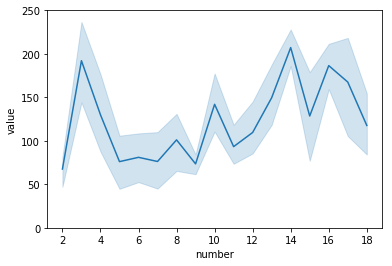

        average_electricity_price  carbon_emitted  addition
kmeans                                                     
16                       5.673331             0.0  5.673331
               id  average_electricity_price  carbon_emitted       value  \
count   85.000000                  85.000000       85.000000   85.000000   
mean    79.000000                  11.929211       73.838340  103.601893   
std     85.387213                   8.565747      124.677933   69.671711   
min      6.000000                   4.188477        0.000000    3.146222   
25%     20.000000                   5.101402        0.000000   49.782009   
50%     31.000000                   5.673331        0.000000   87.411041   
75%    103.000000                  22.196804       50.585041  145.989166   
max    235.000000                  22.486041      318.606659  247.544968   

          number  
count  85.000000  
mean   10.000000  
std     4.928054  
min     2.000000  
25%     6.000000  
50%    10.000000  
75

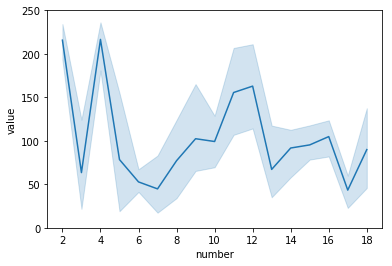

        average_electricity_price  carbon_emitted  addition
kmeans                                                     
19                       6.292337             0.0  6.292337
              id  average_electricity_price  carbon_emitted       value  \
count   68.00000                  68.000000            68.0   68.000000   
mean   115.00000                   6.597993             0.0  126.351805   
std    128.63845                   1.039981             0.0   81.668628   
min     30.00000                   5.652164             0.0    3.013596   
25%     31.50000                   5.671032             0.0   46.109365   
50%     47.50000                   6.292337             0.0  127.477005   
75%    131.00000                   7.219299             0.0  189.970650   
max    335.00000                   8.155135             0.0  246.966003   

          number  
count  68.000000  
mean   10.000000  
std     4.935404  
min     2.000000  
25%     6.000000  
50%    10.000000  
75%    14.0

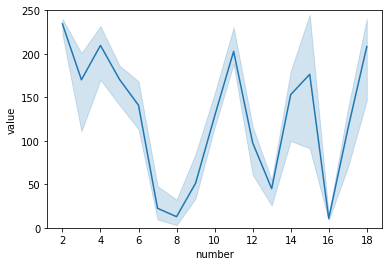

        average_electricity_price  carbon_emitted  addition
kmeans                                                     
5                        6.429343             0.0  6.429343
               id  average_electricity_price  carbon_emitted       value  \
count   68.000000                  68.000000            68.0   68.000000   
mean    84.000000                   6.529599             0.0  118.385517   
std     68.055947                   0.711579             0.0   72.951495   
min     33.000000                   5.704144             0.0    7.539859   
25%     42.000000                   5.987421             0.0   52.568238   
50%     51.500000                   6.429343             0.0  114.738873   
75%     93.500000                   6.971520             0.0  175.622284   
max    200.000000                   7.555565             0.0  246.676651   

          number  
count  68.000000  
mean   10.000000  
std     4.935404  
min     2.000000  
25%     6.000000  
50%    10.000000  
75

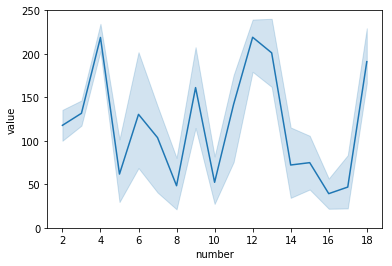

        average_electricity_price  carbon_emitted  addition
kmeans                                                     
7                        6.433941             0.0  6.433941
               id  average_electricity_price  carbon_emitted       value  \
count   68.000000                  68.000000            68.0   68.000000   
mean    87.250000                   6.752760             0.0  117.361759   
std     54.886144                   1.001842             0.0   70.068792   
min     36.000000                   5.739503             0.0    5.041587   
25%     48.750000                   6.251567             0.0   57.252703   
50%     68.000000                   6.433941             0.0  113.126316   
75%    106.500000                   6.935133             0.0  174.443020   
max    177.000000                   8.403655             0.0  249.146271   

          number  
count  68.000000  
mean   10.000000  
std     4.935404  
min     2.000000  
25%     6.000000  
50%    10.000000  
75

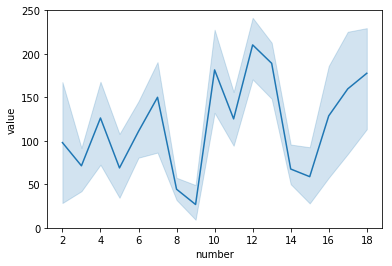

        average_electricity_price  carbon_emitted  addition
kmeans                                                     
1                        6.447614             0.0  6.447614
               id  average_electricity_price  carbon_emitted       value  \
count  119.000000                 119.000000           119.0  119.000000   
mean   245.714286                   6.685138             0.0  152.678468   
std    156.616131                   2.000474             0.0   72.027288   
min      4.000000                   4.105935             0.0    4.041417   
25%     86.000000                   4.359230             0.0   95.715309   
50%    249.000000                   6.447614             0.0  171.858871   
75%    406.000000                   8.579289             0.0  216.365311   
max    480.000000                  10.040091             0.0  249.146271   

           number  
count  119.000000  
mean    10.000000  
std      4.919694  
min      2.000000  
25%      6.000000  
50%     10.0000

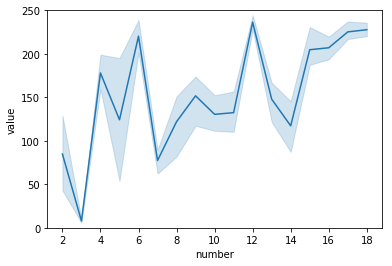

        average_electricity_price  carbon_emitted  addition
kmeans                                                     
36                       6.506432             0.0  6.506432
               id  average_electricity_price  carbon_emitted       value  \
count   68.000000                  68.000000       68.000000   68.000000   
mean    94.750000                  11.525247       37.091583  142.733914   
std     53.386335                   9.174880       64.722168   71.238253   
min     39.000000                   5.797197        0.000000    0.311432   
25%     51.000000                   6.258480        0.000000   85.416616   
50%     83.000000                   6.506432        0.000000  138.561623   
75%    126.750000                  11.773198       37.091583  210.489799   
max    174.000000                  27.290927      148.366333  249.450592   

          number  
count  68.000000  
mean   10.000000  
std     4.935404  
min     2.000000  
25%     6.000000  
50%    10.000000  
75

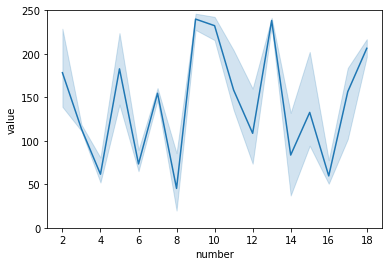

        average_electricity_price  carbon_emitted  addition
kmeans                                                     
21                       6.596878             0.0  6.596878
               id  average_electricity_price  carbon_emitted       value  \
count   68.000000                  68.000000       68.000000   68.000000   
mean    87.000000                  15.382461       30.511908  124.489964   
std     76.296163                  16.739337       53.241103   76.571084   
min      8.000000                   4.245747        0.000000    4.355389   
25%     23.000000                   5.298122        0.000000   54.289774   
50%     70.500000                   6.596878        0.000000  128.514797   
75%    134.500000                  16.681217       30.511908  202.429855   
max    199.000000                  44.090341      122.047630  242.503860   

          number  
count  68.000000  
mean   10.000000  
std     4.935404  
min     2.000000  
25%     6.000000  
50%    10.000000  
75

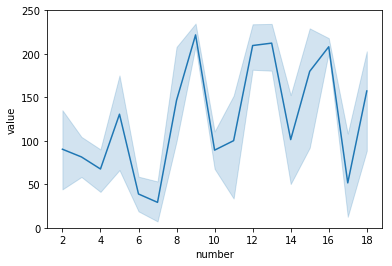

        average_electricity_price  carbon_emitted  addition
kmeans                                                     
14                       6.685415             0.0  6.685415
               id  average_electricity_price  carbon_emitted       value  \
count   85.000000                  85.000000       85.000000   85.000000   
mean   111.600000                  11.176931       13.682092  152.539875   
std     94.464934                   8.278870       26.741152   61.332746   
min     19.000000                   5.087523        0.000000    4.703574   
25%     56.000000                   6.084820        0.000000  108.102158   
50%     88.000000                   6.685415        0.000000  160.443466   
75%    105.000000                  10.869112        1.575605  206.774216   
max    290.000000                  27.157787       66.834854  247.327179   

          number  
count  85.000000  
mean   10.000000  
std     4.928054  
min     2.000000  
25%     6.000000  
50%    10.000000  
75

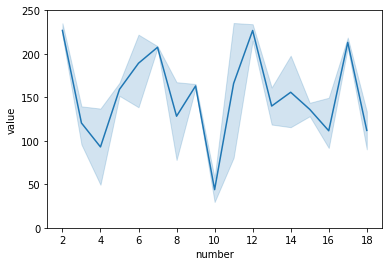

        average_electricity_price  carbon_emitted  addition
kmeans                                                     
24                       6.828566             0.0  6.828566
               id  average_electricity_price  carbon_emitted       value  \
count   51.000000                  51.000000       51.000000   51.000000   
mean    73.333333                  13.299467       40.015361  125.444507   
std     24.975722                   9.547732       57.153367   72.569060   
min     52.000000                   6.403124        0.000000   14.309246   
25%     52.000000                   6.403124        0.000000   60.479794   
50%     60.000000                   6.828566        0.000000  109.878021   
75%    108.000000                  26.666709      120.046082  196.481056   
max    108.000000                  26.666709      120.046082  249.691071   

          number  
count  51.000000  
mean   10.000000  
std     4.947727  
min     2.000000  
25%     6.000000  
50%    10.000000  
75

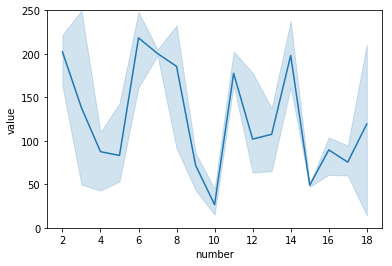

        average_electricity_price  carbon_emitted  addition
kmeans                                                     
20                       6.901496             0.0  6.901496
               id  average_electricity_price  carbon_emitted       value  \
count  187.000000                 187.000000      187.000000  187.000000   
mean    60.818182                   8.129262        2.728320  104.954313   
std     18.108071                   3.840743        8.074062   63.680826   
min     34.000000                   5.707798        0.000000    0.251255   
25%     46.000000                   6.082095        0.000000   53.112116   
50%     62.000000                   6.901496        0.000000   96.797386   
75%     70.000000                   7.313974        0.000000  146.470123   
max     92.000000                  19.300350       28.135799  249.750687   

           number  
count  187.000000  
mean    10.000000  
std      4.912131  
min      2.000000  
25%      6.000000  
50%     10.0000

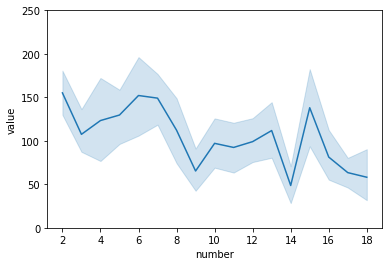

        average_electricity_price  carbon_emitted  addition
kmeans                                                     
12                       7.006482             0.0  7.006482
               id  average_electricity_price  carbon_emitted       value  \
count   68.000000                  68.000000       68.000000   68.000000   
mean   128.000000                  14.218901       37.503414  150.699601   
std     86.448846                  13.406566       65.440783   62.492822   
min     48.000000                   5.640600        0.000000   14.093628   
25%     68.250000                   5.993827        0.000000  105.444559   
50%     97.000000                   7.006482        0.000000  150.424789   
75%    156.750000                  15.231556       37.503414  208.561508   
max    270.000000                  37.222039      150.013657  249.527405   

          number  
count  68.000000  
mean   10.000000  
std     4.935404  
min     2.000000  
25%     6.000000  
50%    10.000000  
75

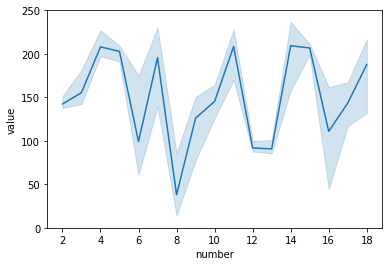

        average_electricity_price  carbon_emitted  addition
kmeans                                                     
38                       7.156151             0.0  7.156151
              id  average_electricity_price  carbon_emitted       value  \
count  51.000000                  51.000000            51.0   51.000000   
mean   49.666667                   6.428237             0.0  140.947878   
std    25.474432                   1.128127             0.0   71.260821   
min    14.000000                   4.850121             0.0    0.213867   
25%    14.000000                   4.850121             0.0   71.590847   
50%    67.000000                   7.156151             0.0  158.401917   
75%    68.000000                   7.278438             0.0  195.507835   
max    68.000000                   7.278438             0.0  249.691071   

          number  
count  51.000000  
mean   10.000000  
std     4.947727  
min     2.000000  
25%     6.000000  
50%    10.000000  
75%    14.0

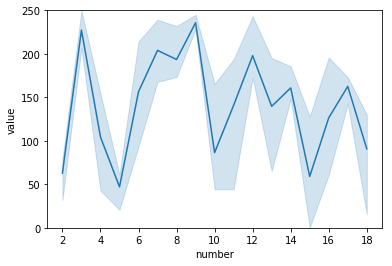

        average_electricity_price  carbon_emitted  addition
kmeans                                                     
13                       7.331492             0.0  7.331492
               id  average_electricity_price  carbon_emitted       value  \
count  102.000000                 102.000000      102.000000  102.000000   
mean   105.000000                   8.923564        4.376680  115.712870   
std     78.025764                   5.098697        9.834883   67.531797   
min     15.000000                   4.881375        0.000000    5.463437   
25%     50.000000                   6.229048        0.000000   59.847442   
50%     72.500000                   7.331492        0.000000  115.360954   
75%    189.000000                   7.707012        0.000000  166.654800   
max    231.000000                  20.060963       26.260080  248.988083   

           number  
count  102.000000  
mean    10.000000  
std      4.923172  
min      2.000000  
25%      6.000000  
50%     10.0000

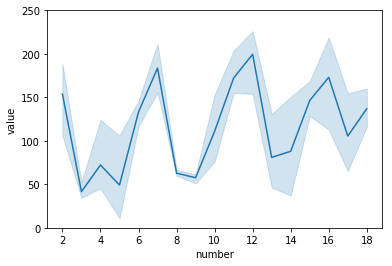

        average_electricity_price  carbon_emitted  addition
kmeans                                                     
9                        7.478122             0.0  7.478122
               id  average_electricity_price  carbon_emitted       value  \
count  102.000000                 102.000000      102.000000  102.000000   
mean   115.833333                  13.452690       16.965421  124.647392   
std     68.363919                  13.781091       38.123173   71.726141   
min     40.000000                   5.929715        0.000000    3.652080   
25%     57.000000                   6.706380        0.000000   69.281357   
50%     92.500000                   7.478122        0.000000  122.197365   
75%    191.000000                   9.087872        0.000000  180.113060   
max    222.000000                  44.035928      101.792526  246.362213   

           number  
count  102.000000  
mean    10.000000  
std      4.923172  
min      2.000000  
25%      6.000000  
50%     10.0000

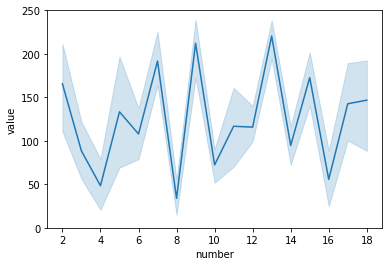

        average_electricity_price  carbon_emitted  addition
kmeans                                                     
25                       7.577943             0.0  7.577943
               id  average_electricity_price  carbon_emitted       value  \
count   68.000000                  68.000000       68.000000   68.000000   
mean   124.250000                  10.301965       19.435280  124.036815   
std    129.944233                   7.071034       33.913177   66.780157   
min      2.000000                   3.909752        0.000000    1.620905   
25%     44.750000                   6.088655        0.000000   73.473196   
50%     77.500000                   7.577943        0.000000  110.699066   
75%    157.000000                  11.791253       19.435280  183.433575   
max    340.000000                  22.142221       77.741119  240.292191   

          number  
count  68.000000  
mean   10.000000  
std     4.935404  
min     2.000000  
25%     6.000000  
50%    10.000000  
75

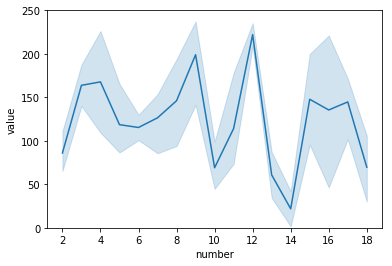

        average_electricity_price  carbon_emitted  addition
kmeans                                                     
29                       7.631643             0.0  7.631643
               id  average_electricity_price  carbon_emitted       value  \
count   51.000000                  51.000000       51.000000   51.000000   
mean   204.333333                  15.227564       57.531362  150.675748   
std    174.913655                  11.907387       82.171221   70.092809   
min     49.000000                   6.171143        0.000000    5.738347   
25%     49.000000                   6.171143        0.000000   87.301754   
50%    118.000000                   7.631643        0.000000  158.422714   
75%    446.000000                  31.879906      172.594086  216.535164   
max    446.000000                  31.879906      172.594086  243.112488   

          number  
count  51.000000  
mean   10.000000  
std     4.947727  
min     2.000000  
25%     6.000000  
50%    10.000000  
75

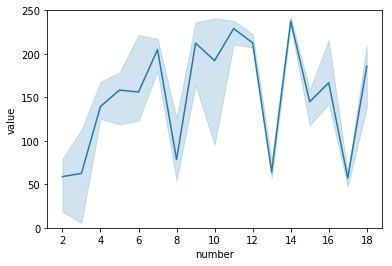

        average_electricity_price  carbon_emitted  addition
kmeans                                                     
32                       7.652561             0.0  7.652561
               id  average_electricity_price  carbon_emitted       value  \
count   51.000000                  51.000000            51.0   51.000000   
mean   247.333333                  23.761949             0.0  130.543144   
std    157.077518                  23.274799             0.0   69.661032   
min     69.000000                   7.280806             0.0    6.581522   
25%     69.000000                   7.280806             0.0   78.703213   
50%    225.000000                   7.652561             0.0  133.864578   
75%    448.000000                  56.352479             0.0  179.685898   
max    448.000000                  56.352479             0.0  243.693497   

          number  
count  51.000000  
mean   10.000000  
std     4.947727  
min     2.000000  
25%     6.000000  
50%    10.000000  
75

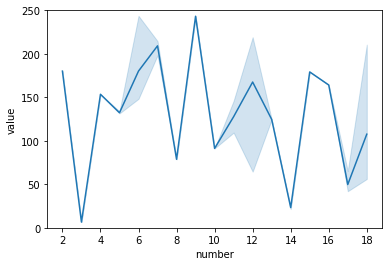

        average_electricity_price  carbon_emitted  addition
kmeans                                                     
23                       7.668714             0.0  7.668714
               id  average_electricity_price  carbon_emitted       value  \
count   51.000000                  51.000000            51.0   51.000000   
mean   103.333333                   7.125460             0.0  123.130381   
std     73.896053                   1.164217             0.0   75.685093   
min     27.000000                   5.522709             0.0    1.292622   
25%     27.000000                   5.522709             0.0   56.819220   
50%     81.000000                   7.668714             0.0  125.529503   
75%    202.000000                   8.184958             0.0  188.507454   
max    202.000000                   8.184958             0.0  246.322479   

          number  
count  51.000000  
mean   10.000000  
std     4.947727  
min     2.000000  
25%     6.000000  
50%    10.000000  
75

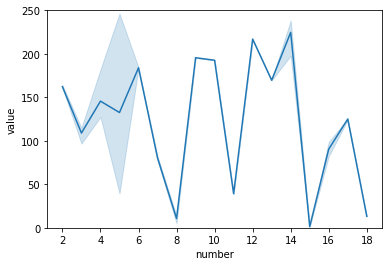

        average_electricity_price  carbon_emitted  addition
kmeans                                                     
8                        7.709199             0.0  7.709199
               id  average_electricity_price  carbon_emitted       value  \
count  119.000000                 119.000000           119.0  119.000000   
mean   210.285714                   7.348685             0.0  124.989401   
std    170.124289                   1.717575             0.0   75.332766   
min     11.000000                   4.616538             0.0    0.037002   
25%     35.000000                   5.713860             0.0   71.342903   
50%    219.000000                   7.709199             0.0  107.668091   
75%    349.000000                   8.903005             0.0  192.730530   
max    478.000000                   9.613738             0.0  248.503677   

           number  
count  119.000000  
mean    10.000000  
std      4.919694  
min      2.000000  
25%      6.000000  
50%     10.0000

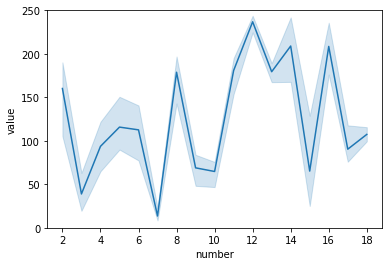

        average_electricity_price  carbon_emitted  addition
kmeans                                                     
15                       7.751792             0.0  7.751792
               id  average_electricity_price  carbon_emitted       value  \
count   85.000000                  85.000000       85.000000   85.000000   
mean   140.600000                  12.602696       31.001900  125.054249   
std    160.835852                   7.994286       43.542653   73.846860   
min     13.000000                   4.689028        0.000000    1.138418   
25%     44.000000                   6.074587        0.000000   63.494354   
50%     94.000000                   7.751792        0.000000  131.571884   
75%     98.000000                  21.575875       44.642136  189.939758   
max    454.000000                  22.922200      110.367363  243.894821   

          number  
count  85.000000  
mean   10.000000  
std     4.928054  
min     2.000000  
25%     6.000000  
50%    10.000000  
75

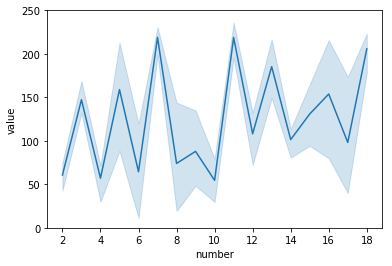

        average_electricity_price  carbon_emitted  addition
kmeans                                                     
18                       8.037814             0.0  8.037814
              id  average_electricity_price  carbon_emitted       value  \
count  51.000000                  51.000000            51.0   51.000000   
mean   60.000000                   7.186282             0.0  112.744178   
std    30.843476                   1.566734             0.0   74.560915   
min    17.000000                   5.009528             0.0    2.314526   
25%    17.000000                   5.009528             0.0   38.828987   
50%    78.000000                   8.037814             0.0  111.460213   
75%    85.000000                   8.511504             0.0  166.528847   
max    85.000000                   8.511504             0.0  246.263596   

          number  
count  51.000000  
mean   10.000000  
std     4.947727  
min     2.000000  
25%     6.000000  
50%    10.000000  
75%    14.0

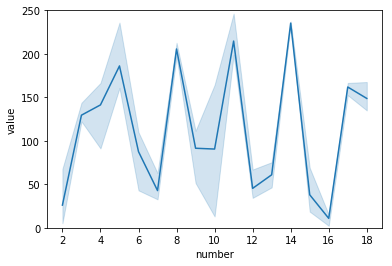

        average_electricity_price  carbon_emitted  addition
kmeans                                                     
30                       8.153676             0.0  8.153676
               id  average_electricity_price  carbon_emitted       value  \
count   68.000000                  68.000000       68.000000   68.000000   
mean   106.000000                  15.208822       34.045582  143.527012   
std     65.079056                  14.133207       59.407112   73.933269   
min     21.000000                   5.122830        0.000000    7.697445   
25%     70.500000                   7.019926        0.000000   78.278603   
50%    101.000000                   8.153676        0.000000  151.290764   
75%    136.500000                  16.342571       34.045582  207.005516   
max    201.000000                  39.405105      136.182327  249.590805   

          number  
count  68.000000  
mean   10.000000  
std     4.935404  
min     2.000000  
25%     6.000000  
50%    10.000000  
75

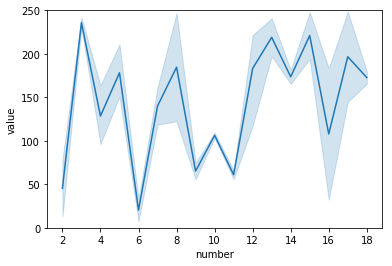

        average_electricity_price  carbon_emitted  addition
kmeans                                                     
17                       8.402521             0.0  8.402521
               id  average_electricity_price  carbon_emitted       value  \
count  136.000000                 136.000000           136.0  136.000000   
mean   153.750000                  13.351337             0.0  104.523517   
std    129.225485                  14.462428             0.0   70.234755   
min     16.000000                   4.956789             0.0    1.036646   
25%     66.250000                   7.318143             0.0   49.694356   
50%     83.000000                   8.402521             0.0   97.594803   
75%    255.500000                   9.943590             0.0  163.390007   
max    355.000000                  51.224565             0.0  249.593048   

          number  
count  136.00000  
mean    10.00000  
std      4.91709  
min      2.00000  
25%      6.00000  
50%     10.00000  
75

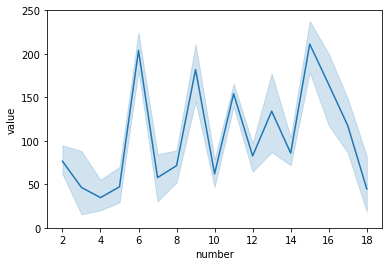

        average_electricity_price  carbon_emitted  addition
kmeans                                                     
3                        9.111672             0.0  9.111672
               id  average_electricity_price  carbon_emitted       value  \
count  119.000000                 119.000000      119.000000  119.000000   
mean   225.428571                  24.377272       47.005768  124.085934   
std    158.511699                  29.037044       95.636322   62.958129   
min      7.000000                   4.204944        0.000000    4.075459   
25%     97.000000                   6.752700        0.000000   80.501259   
50%    181.000000                   9.111672        0.000000  124.660019   
75%    359.000000                  26.247860       53.121952  164.705879   
max    473.000000                  92.614339      275.918427  249.037048   

           number  
count  119.000000  
mean    10.000000  
std      4.919694  
min      2.000000  
25%      6.000000  
50%     10.0000

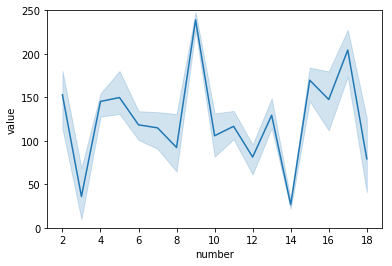

        average_electricity_price  carbon_emitted  addition
kmeans                                                     
39                      16.143492       26.239668  42.38316
               id  average_electricity_price  carbon_emitted       value  \
count  102.000000                 102.000000      102.000000  102.000000   
mean    89.166667                  16.467038      151.762447  127.370842   
std     78.519101                  11.386174      264.133597   65.674945   
min     12.000000                   4.624611        0.000000    6.642238   
25%     18.000000                   5.032646        0.000000   74.386271   
50%     76.500000                  16.143492       26.239668  119.490978   
75%    114.000000                  26.691422      127.577461  183.134888   
max    238.000000                  30.166565      730.517883  235.058044   

           number  
count  102.000000  
mean    10.000000  
std      4.923172  
min      2.000000  
25%      6.000000  
50%     10.0000

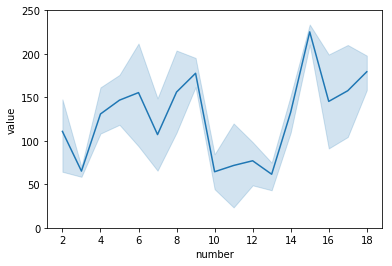

        average_electricity_price  carbon_emitted   addition
kmeans                                                      
4                       23.775201       73.672997  97.448198
               id  average_electricity_price  carbon_emitted       value  \
count   85.000000                  85.000000       85.000000   85.000000   
mean    85.400000                  20.018226      113.637564  130.345090   
std     31.087128                   7.445888      110.732004   60.508794   
min     24.000000                   5.303285        0.000000    7.342966   
25%     95.000000                  22.250440       65.125000   82.413788   
50%    100.000000                  23.775201       73.672997  138.042221   
75%    102.000000                  24.028626      106.765984  172.052750   
max    106.000000                  24.733576      322.623840  241.811096   

          number  
count  85.000000  
mean   10.000000  
std     4.928054  
min     2.000000  
25%     6.000000  
50%    10.000000  

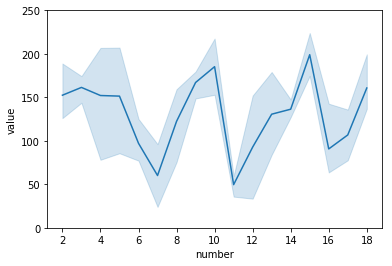

In [107]:
for cluster_num in cluster_dat.sort_values('addition').index:
    cluster_needed = kmeans_results[kmeans_results.kmeans==cluster_num]
    if len(cluster_needed) > 2:
        cluster_needed_long = cluster_needed.melt(id_vars=['id','average_electricity_price','carbon_emitted'], value_vars=[col for col in results_mod if col.startswith('carbon_')][1:])

        cluster_needed_long[['carbon', 'number']] = cluster_needed_long['variable'].str.split('_',expand=True)

        # results_mod['number'] = pd.to_numeric(results_mod['number'], errors='coerce')
        cluster_needed_long['number'] = cluster_needed_long['number'].apply(pd.to_numeric, errors='coerce')
        print(cluster_dat[cluster_dat.index==cluster_num])
        print(cluster_needed_long.describe())
        g = sns.lineplot(data=cluster_needed_long, x='number', y='value')
        g.set(ylim=(0, 250))
        plt.show()
        plt.close()

        average_electricity_price  carbon_emitted  addition
kmeans                                                     
0                        4.695438             0.0  4.695438


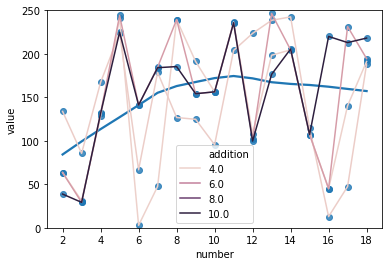

        average_electricity_price  carbon_emitted  addition
kmeans                                                     
2                        5.651115             0.0  5.651115


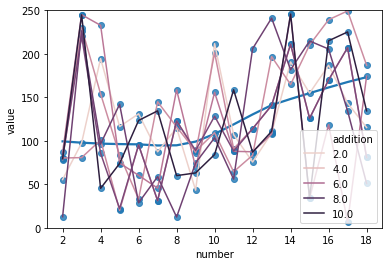

        average_electricity_price  carbon_emitted  addition
kmeans                                                     
16                       5.673331             0.0  5.673331


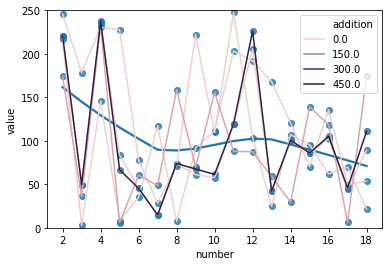

        average_electricity_price  carbon_emitted  addition
kmeans                                                     
19                       6.292337             0.0  6.292337


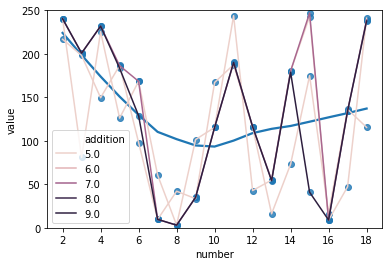

        average_electricity_price  carbon_emitted  addition
kmeans                                                     
5                        6.429343             0.0  6.429343


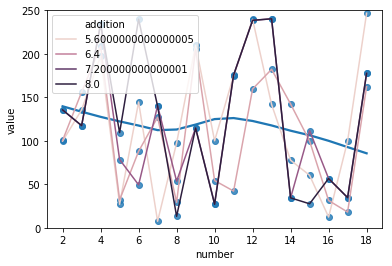

        average_electricity_price  carbon_emitted  addition
kmeans                                                     
7                        6.433941             0.0  6.433941


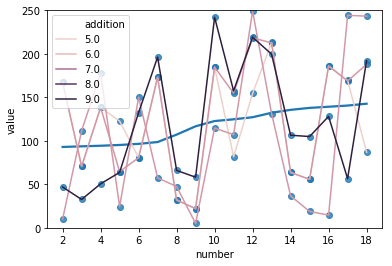

        average_electricity_price  carbon_emitted  addition
kmeans                                                     
1                        6.447614             0.0  6.447614


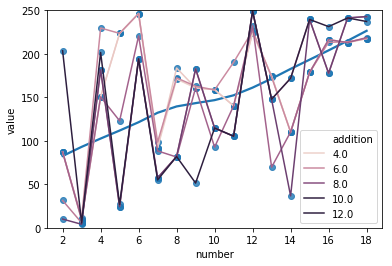

        average_electricity_price  carbon_emitted  addition
kmeans                                                     
36                       6.506432             0.0  6.506432


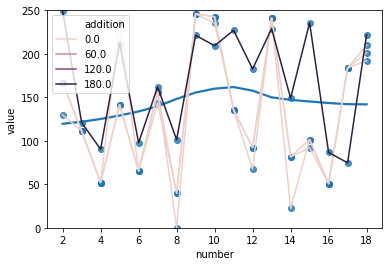

        average_electricity_price  carbon_emitted  addition
kmeans                                                     
21                       6.596878             0.0  6.596878


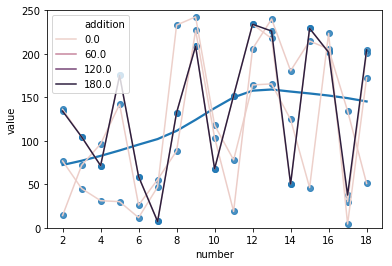

        average_electricity_price  carbon_emitted  addition
kmeans                                                     
14                       6.685415             0.0  6.685415


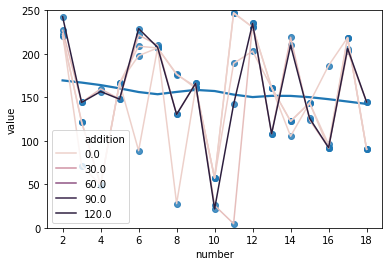

        average_electricity_price  carbon_emitted  addition
kmeans                                                     
24                       6.828566             0.0  6.828566


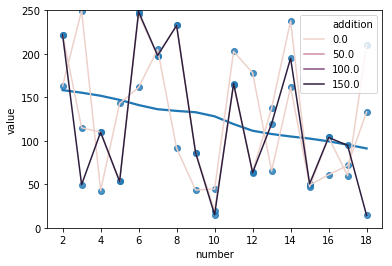

        average_electricity_price  carbon_emitted  addition
kmeans                                                     
20                       6.901496             0.0  6.901496


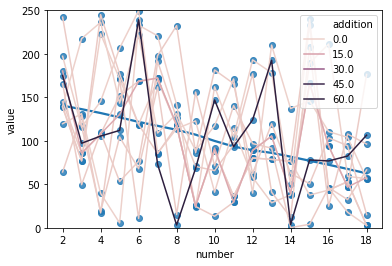

        average_electricity_price  carbon_emitted  addition
kmeans                                                     
12                       7.006482             0.0  7.006482


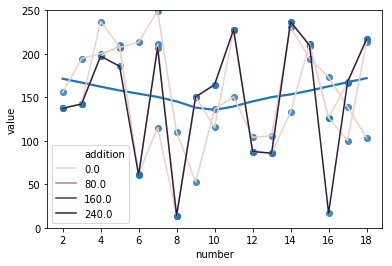

        average_electricity_price  carbon_emitted  addition
kmeans                                                     
38                       7.156151             0.0  7.156151


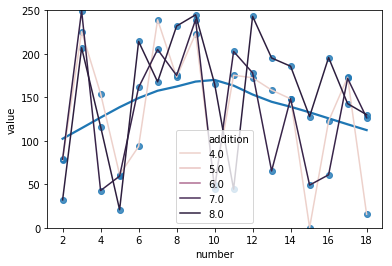

        average_electricity_price  carbon_emitted  addition
kmeans                                                     
13                       7.331492             0.0  7.331492


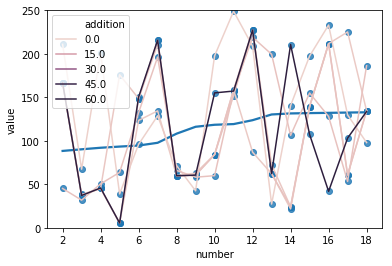

        average_electricity_price  carbon_emitted  addition
kmeans                                                     
9                        7.478122             0.0  7.478122


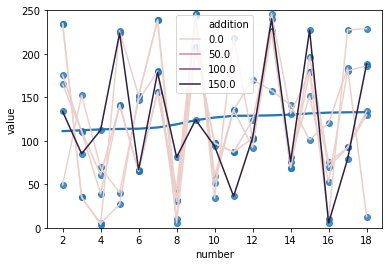

        average_electricity_price  carbon_emitted  addition
kmeans                                                     
25                       7.577943             0.0  7.577943


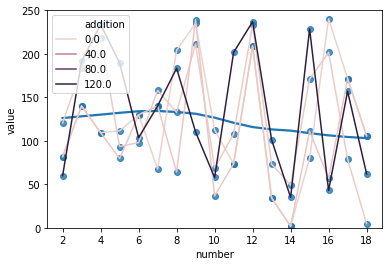

        average_electricity_price  carbon_emitted  addition
kmeans                                                     
29                       7.631643             0.0  7.631643


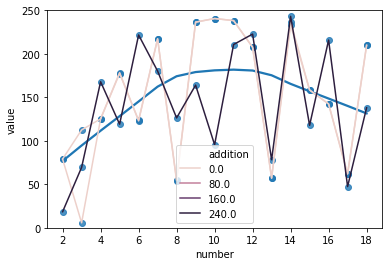

        average_electricity_price  carbon_emitted  addition
kmeans                                                     
32                       7.652561             0.0  7.652561


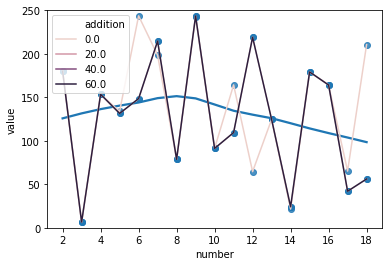

        average_electricity_price  carbon_emitted  addition
kmeans                                                     
23                       7.668714             0.0  7.668714


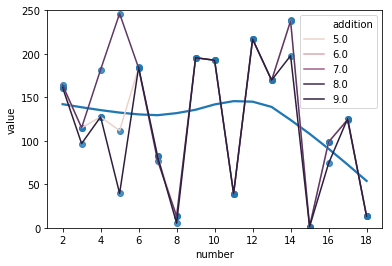

        average_electricity_price  carbon_emitted  addition
kmeans                                                     
8                        7.709199             0.0  7.709199


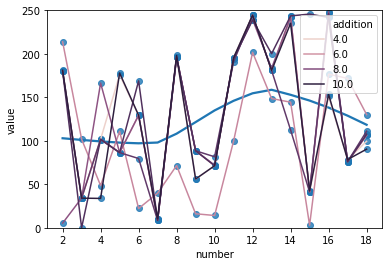

        average_electricity_price  carbon_emitted  addition
kmeans                                                     
15                       7.751792             0.0  7.751792


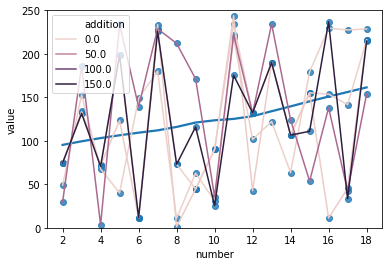

        average_electricity_price  carbon_emitted  addition
kmeans                                                     
18                       8.037814             0.0  8.037814


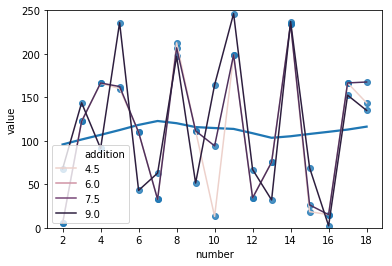

        average_electricity_price  carbon_emitted  addition
kmeans                                                     
30                       8.153676             0.0  8.153676


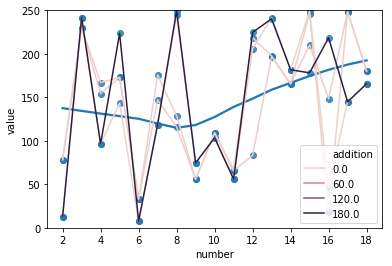

        average_electricity_price  carbon_emitted  addition
kmeans                                                     
17                       8.402521             0.0  8.402521


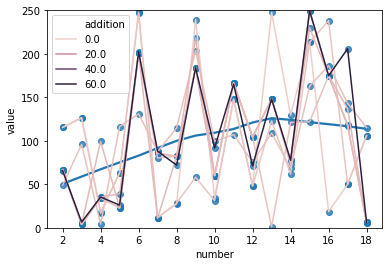

        average_electricity_price  carbon_emitted  addition
kmeans                                                     
3                        9.111672             0.0  9.111672


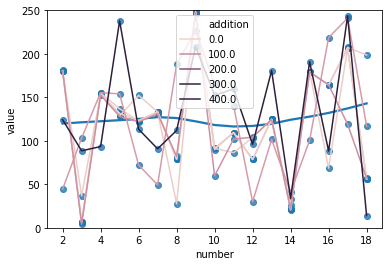

        average_electricity_price  carbon_emitted  addition
kmeans                                                     
39                      16.143492       26.239668  42.38316


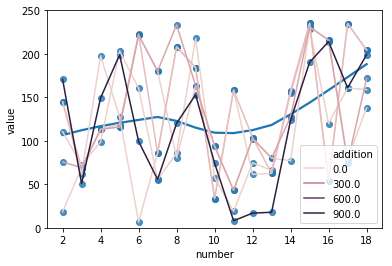

        average_electricity_price  carbon_emitted   addition
kmeans                                                      
4                       23.775201       73.672997  97.448198


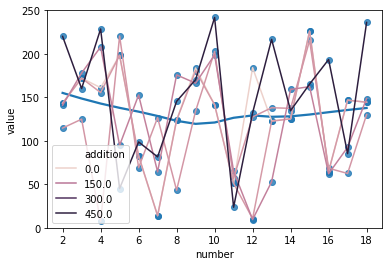

In [108]:
for cluster_num in cluster_dat.sort_values('addition').index:
    cluster_needed = kmeans_results[kmeans_results.kmeans==cluster_num]
    if len(cluster_needed) > 2:
        cluster_needed_long = cluster_needed.melt(id_vars=['id','average_electricity_price','carbon_emitted', 'addition'], value_vars=[col for col in results_mod if col.startswith('carbon_')][1:])

        cluster_needed_long[['carbon', 'number']] = cluster_needed_long['variable'].str.split('_',expand=True)

        # results_mod['number'] = pd.to_numeric(results_mod['number'], errors='coerce')
        cluster_needed_long['number'] = cluster_needed_long['number'].apply(pd.to_numeric, errors='coerce')
        print(cluster_dat[cluster_dat.index==cluster_num])
#         print(cluster_needed_long.describe())
#         print(cluster_needed_long)
        g = sns.regplot(data=cluster_needed_long, x='number', y='value', lowess=True)
        g = sns.lineplot(data=cluster_needed_long, x='number', y='value', hue="addition")
        g.set(ylim=(0, 250))
        plt.show()
        plt.close()

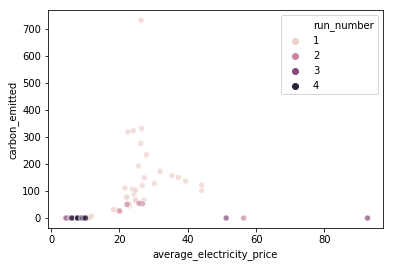

In [109]:
sns.scatterplot(data=results_mod, y='carbon_emitted', x='average_electricity_price', hue='run_number', alpha=0.7)

In [110]:
results_mod.to_csv('/Users/b1017579/Documents/PhD/Projects/10-ELECSIM/run/carbon_tax_optimiser/data/optimisation_data/each_year_optimisation.csv')



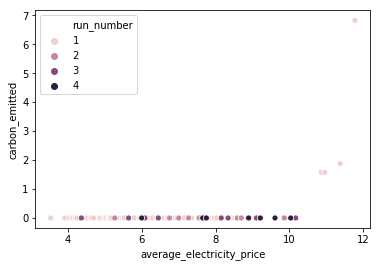

In [111]:
sns.scatterplot(data=results_mod[(results_mod.average_electricity_price < 15) & (results_mod.carbon_emitted < 100)], y='carbon_emitted', x='average_electricity_price', hue='run_number')
# results_mod[(results_mod.average_electricity_price < 5) & (results_mod.carbon_emitted < 100)]

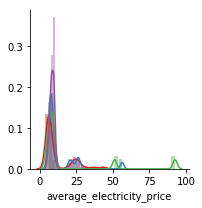

In [112]:
g = sns.FacetGrid(results_mod, hue="run_number", palette="Set1")
g = (g.map(sns.distplot, "average_electricity_price"))

/Users/b1017579/.pyenv/versions/3.6.6/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/Users/b1017579/.pyenv/versions/3.6.6/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


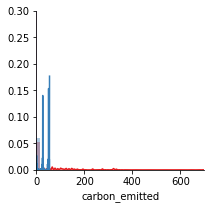

In [113]:
g = sns.FacetGrid(results_mod, hue="run_number", palette="Set1")
g = (g.map(sns.distplot, "carbon_emitted"))
g.set(ylim=(0, 0.3), xlim=(0,700))

In [114]:
results_mod = results_mod.melt(id_vars=['id','average_electricity_price','carbon_emitted','run_number'], value_vars=[col for col in results_mod if col.startswith('carbon_')][1:])

results_mod[['carbon', 'number']] = results_mod['variable'].str.split('_',expand=True)

# results_mod['number'] = pd.to_numeric(results_mod['number'], errors='coerce')
results_mod['number'] = results_mod['number'].apply(pd.to_numeric, errors='coerce')
results_mod

id  average_electricity_price  carbon_emitted  run_number   variable  \
0       1.0                   3.528399             0.0           1   carbon_2   
1       2.0                   3.909752             0.0           1   carbon_2   
2       3.0                   4.041183             0.0           1   carbon_2   
3       4.0                   4.105935             0.0           1   carbon_2   
4       5.0                   4.125593             0.0           1   carbon_2   
...     ...                        ...             ...         ...        ...   
2715  454.0                   7.751792             0.0           4  carbon_18   
2716  473.0                   8.897662             0.0           4  carbon_18   
2717  477.0                   9.215947             0.0           4  carbon_18   
2718  478.0                   9.613738             0.0           4  carbon_18   
2719  480.0                  10.040091             0.0           4  carbon_18   

           value  carbon  number  
0      55.460709  carbon       2  
1      81.836662  carbon       2  
2      63.487507  carbon       2  
3      87.185364  carbon       2  
4     133.796646  carbon       2  
...          ...     ...     ...  
2715  215.839920  carbon      18  
2716  198.600540  carbon      18  
2717  218.130707  carbon      18  
2718   90.414299  carbon      18  
2719  237.185883  carbon      18  

[2720 rows x 8 columns]

In [115]:
results_mod.to_csv('/Users/b1017579/Documents/PhD/Projects/10-ELECSIM/run/carbon_tax_optimiser/data/optimisation_data/each_year_optimisation.csv')



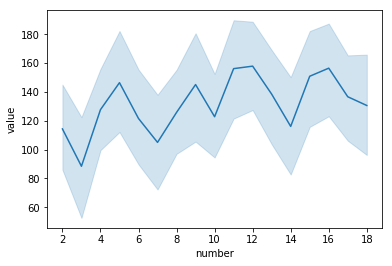

In [116]:
less_than_5 = results_mod[(results_mod.average_electricity_price < 5) & (results_mod.carbon_emitted < 100)]
sns.lineplot(data=less_than_5, x='number', y='value')

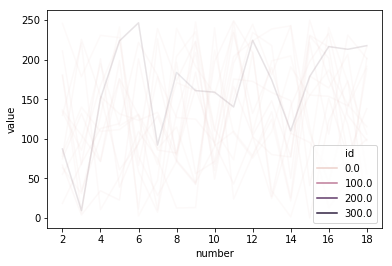

In [117]:
sns.lineplot(data=less_than_5, x='number', y='value', hue='id', alpha=0.1)

In [159]:
min(results_mod_actual_year.number)

2019

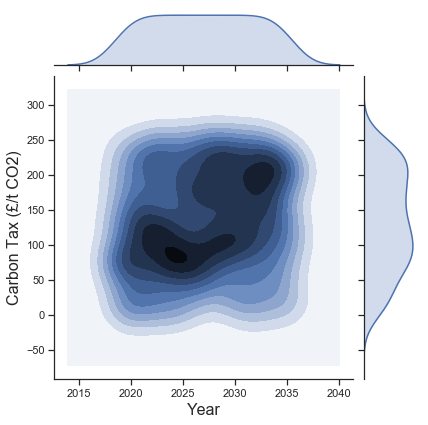

In [160]:
# sns.jointplot(data=results_mod[(results_mod.average_electricity_price < 5) & (results_mod.carbon_emitted < 100)], x='number', y='value', kind='kde')

results_mod_actual_year = results_mod.copy()
results_mod_actual_year.number = results_mod_actual_year.number + 2017

sns.set(font_scale=1)
sns.set_style("ticks")
g=sns.jointplot(data=results_mod_actual_year[(results_mod_actual_year.average_electricity_price < 5) & (results_mod_actual_year.carbon_emitted < 100)], x='number', y='value', kind='kde')

g.set_axis_labels('Year', 'Carbon Tax (£/t CO2)', fontsize=16)
# fig = g.get_figure()


g.savefig('/Users/b1017579/Documents/PhD/Projects/10-ELECSIM/run/carbon_tax_optimiser/figures/results/best_heatmap.pdf', dpi=1000, bbox_inches='tight')



In [119]:
results_mod['avg_elec_price_bin']=pd.cut(results_mod.average_electricity_price, 50)
results_mod

id  average_electricity_price  carbon_emitted  run_number   variable  \
0       1.0                   3.528399             0.0           1   carbon_2   
1       2.0                   3.909752             0.0           1   carbon_2   
2       3.0                   4.041183             0.0           1   carbon_2   
3       4.0                   4.105935             0.0           1   carbon_2   
4       5.0                   4.125593             0.0           1   carbon_2   
...     ...                        ...             ...         ...        ...   
2715  454.0                   7.751792             0.0           4  carbon_18   
2716  473.0                   8.897662             0.0           4  carbon_18   
2717  477.0                   9.215947             0.0           4  carbon_18   
2718  478.0                   9.613738             0.0           4  carbon_18   
2719  480.0                  10.040091             0.0           4  carbon_18   

           value  carbon  number avg_elec_price_bin  
0      55.460709  carbon       2      (3.439, 5.31]  
1      81.836662  carbon       2      (3.439, 5.31]  
2      63.487507  carbon       2      (3.439, 5.31]  
3      87.185364  carbon       2      (3.439, 5.31]  
4     133.796646  carbon       2      (3.439, 5.31]  
...          ...     ...     ...                ...  
2715  215.839920  carbon      18     (7.092, 8.874]  
2716  198.600540  carbon      18    (8.874, 10.655]  
2717  218.130707  carbon      18    (8.874, 10.655]  
2718   90.414299  carbon      18    (8.874, 10.655]  
2719  237.185883  carbon      18    (8.874, 10.655]  

[2720 rows x 9 columns]

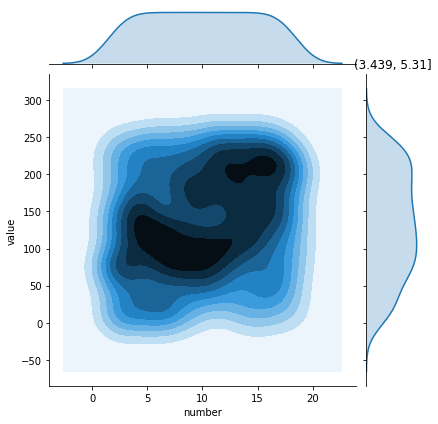

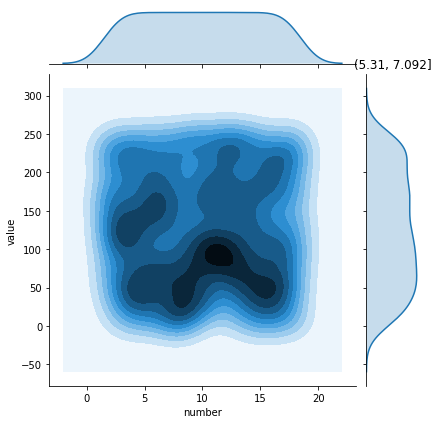

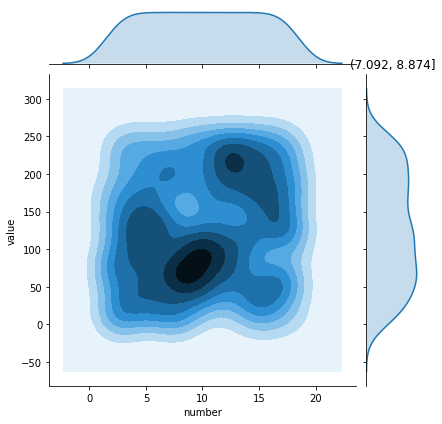

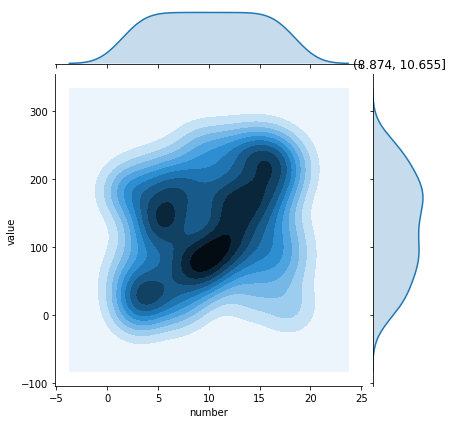

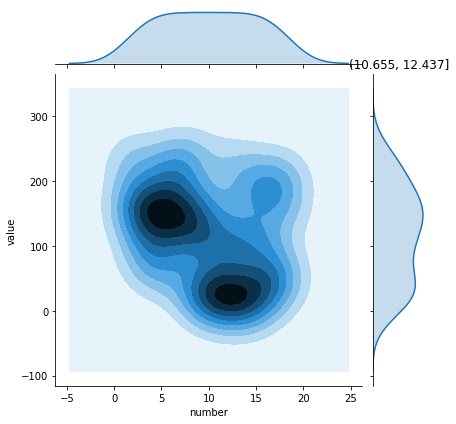

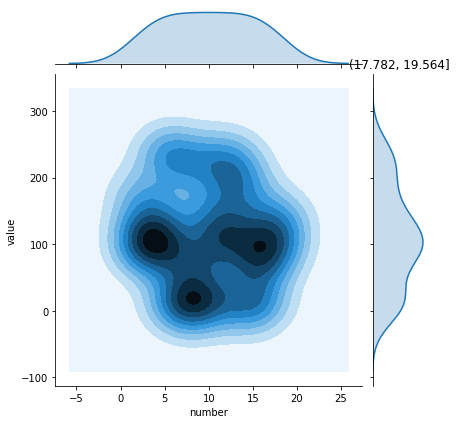

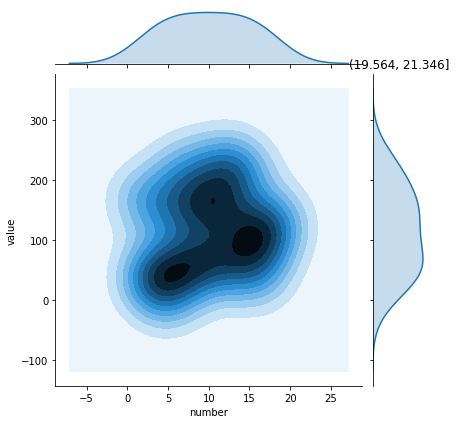

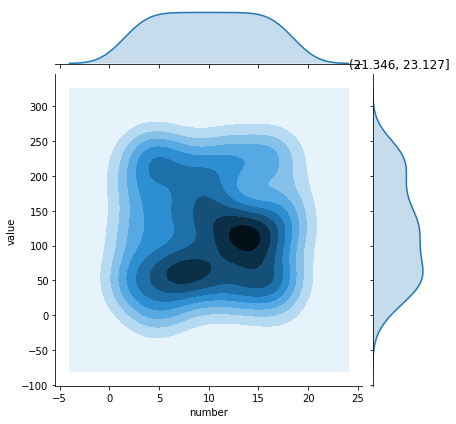

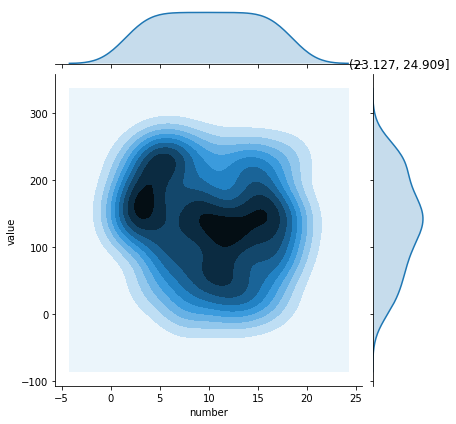

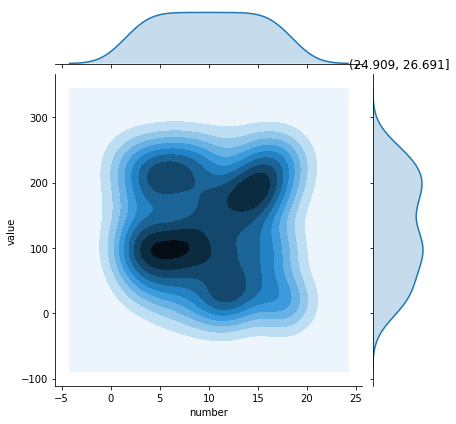

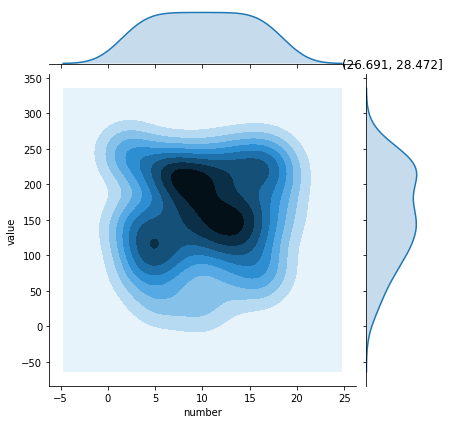

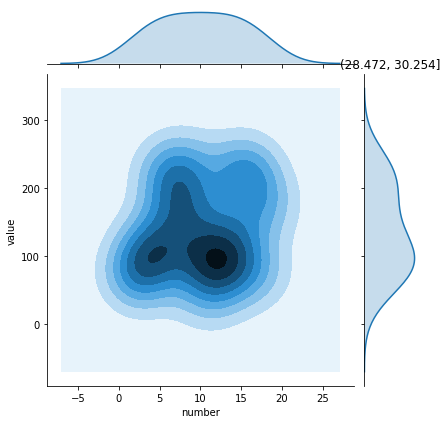

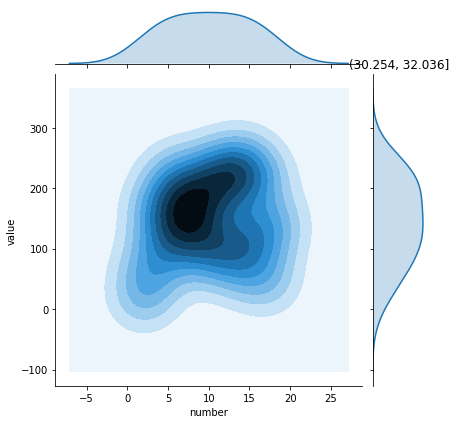

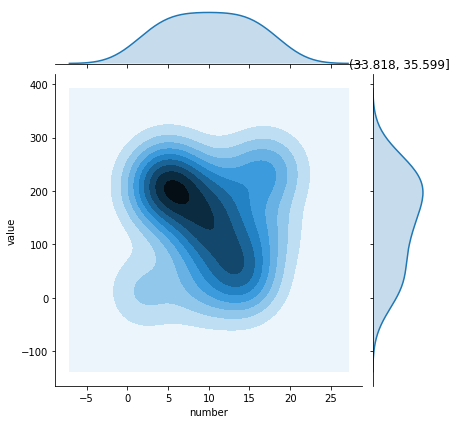

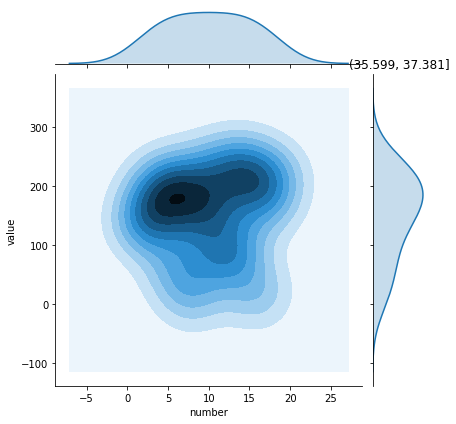

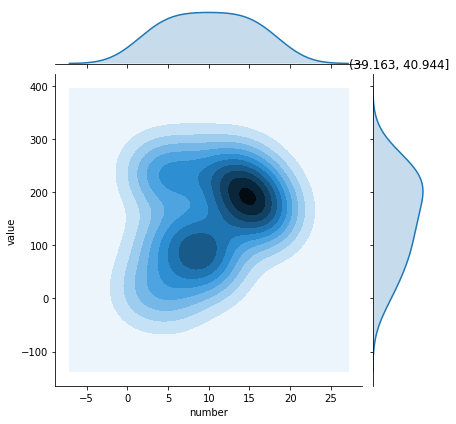

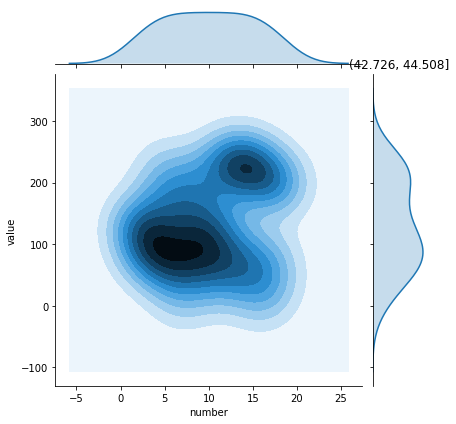

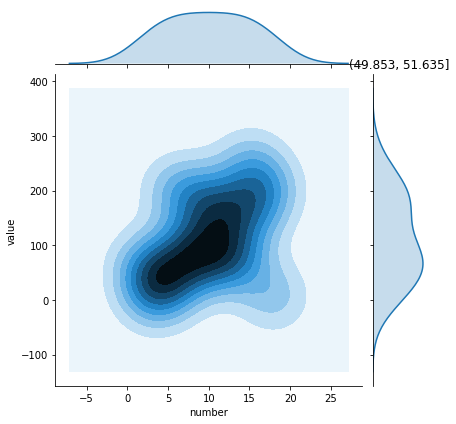

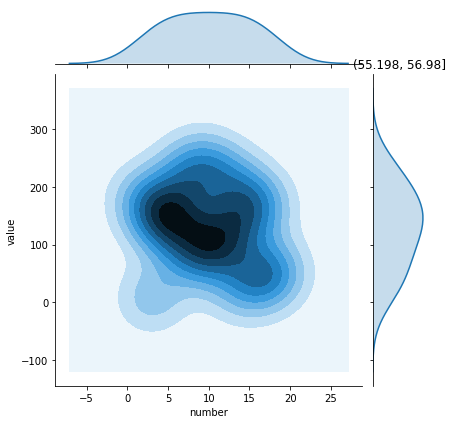

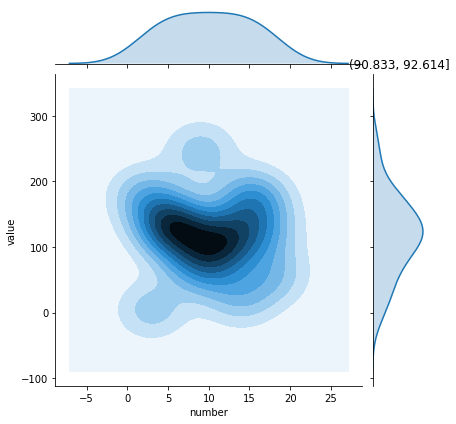

In [120]:

for j, i in results_mod.groupby("avg_elec_price_bin"):
    if not i.empty:
        sns.jointplot(data=i, x='number',y='value', kind='kde')
        plt.title(j)

    
# g = sns.FacetGrid(results_mod, col='avg_elec_price_bin')
# g.map(sns.jointplot(x='number',y='value', kind='kde'))


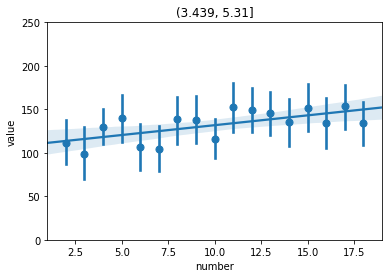

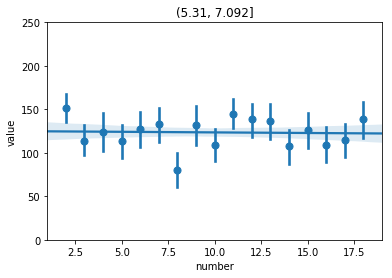

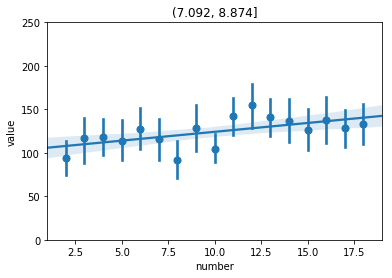

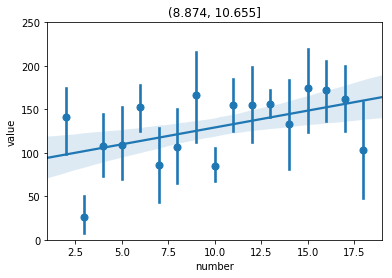

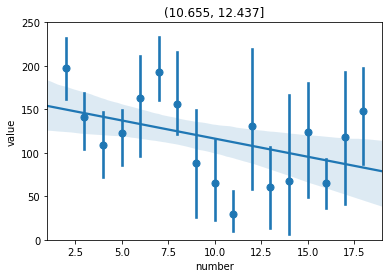

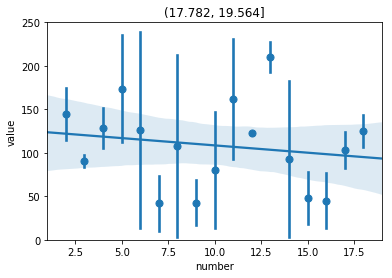

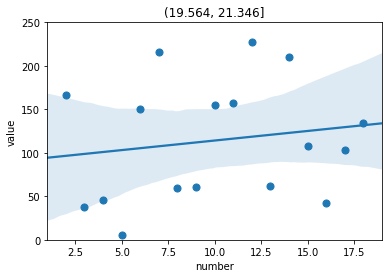

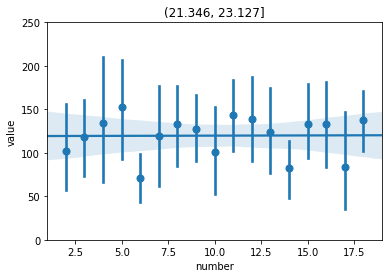

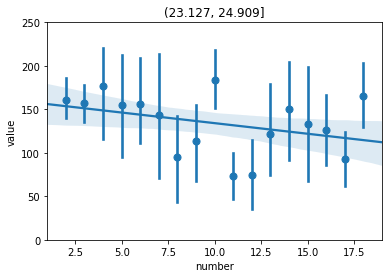

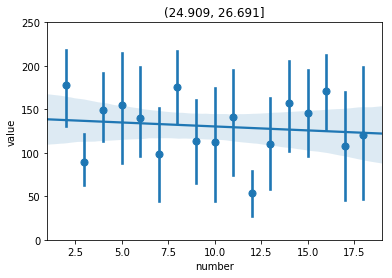

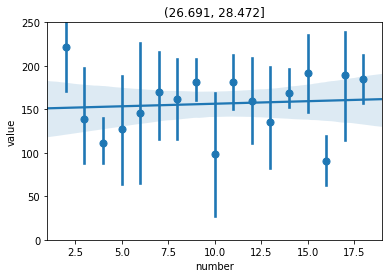

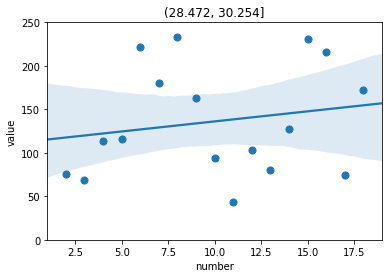

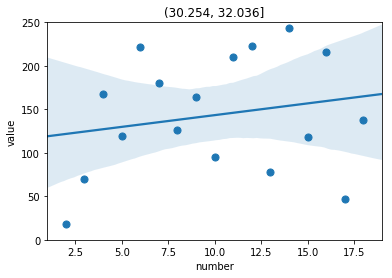

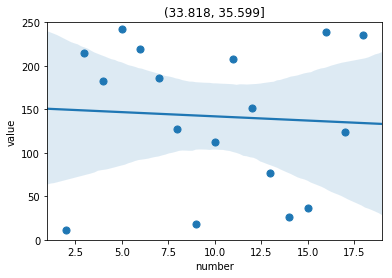

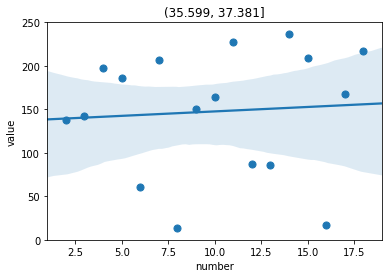

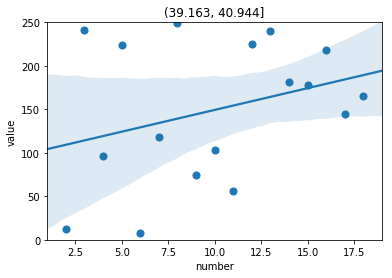

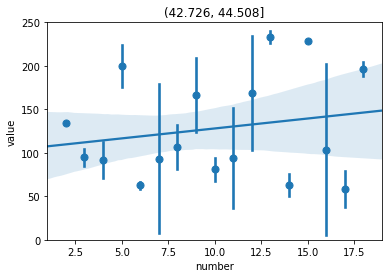

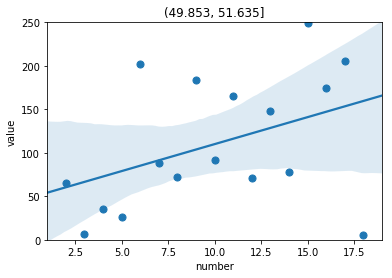

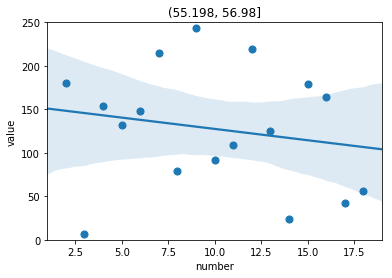

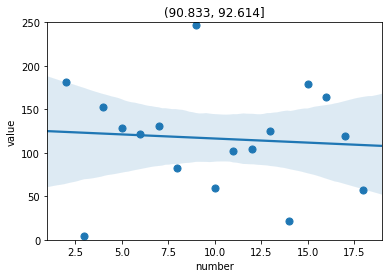

In [121]:
for j, i in results_mod.groupby("avg_elec_price_bin"):
    if not i.empty:
        g = sns.regplot(data=i, x='number',y='value', x_estimator=np.mean)
        g.set(ylim=(0, 250))
        plt.title(j)
        plt.show()
        plt.close()

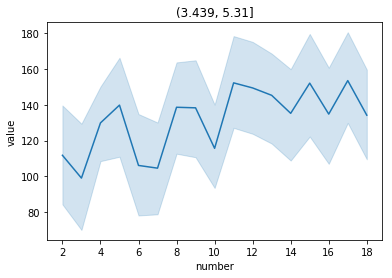

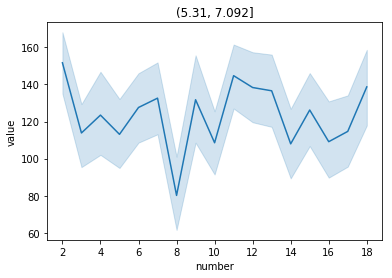

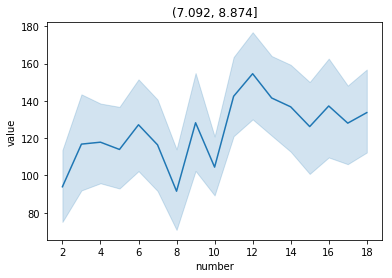

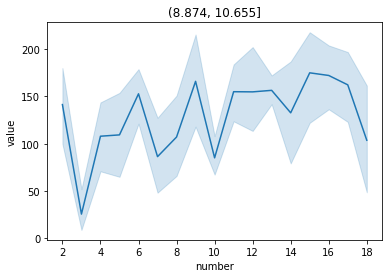

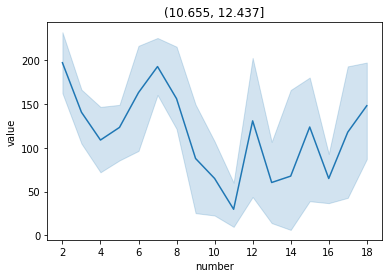

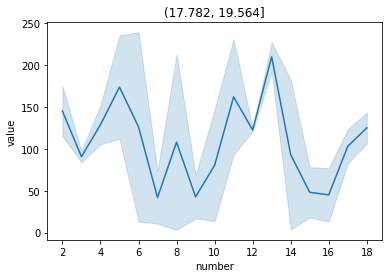

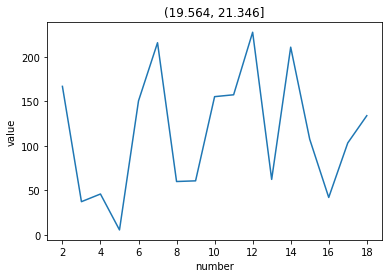

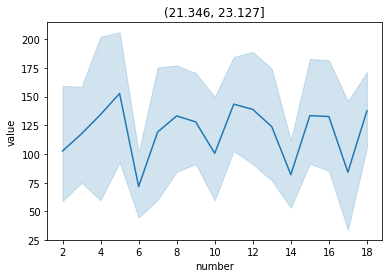

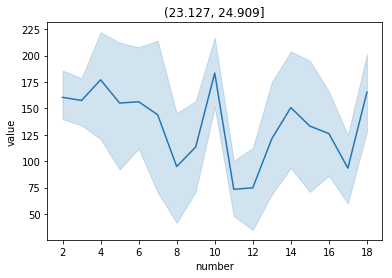

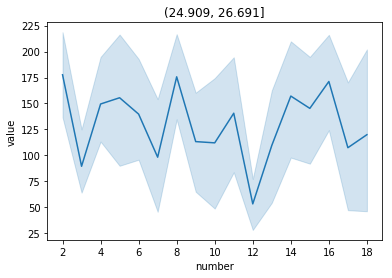

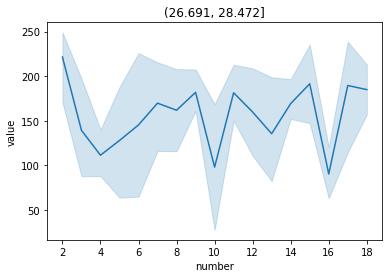

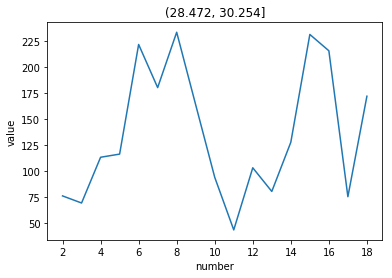

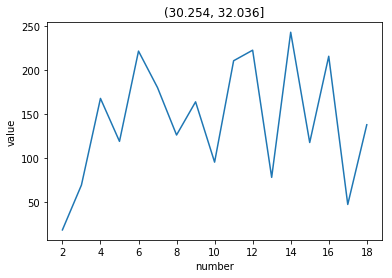

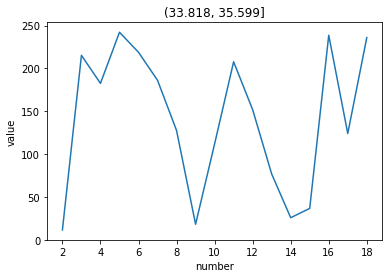

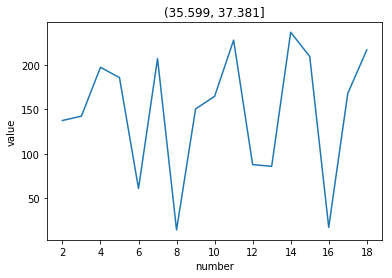

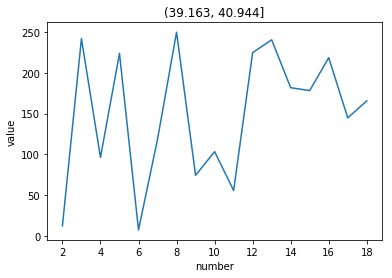

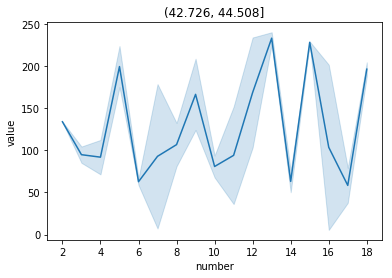

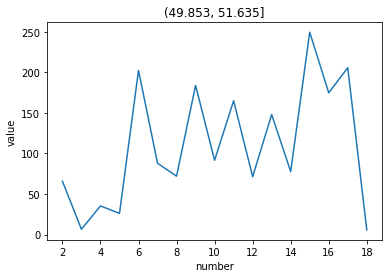

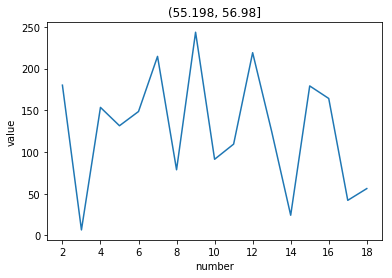

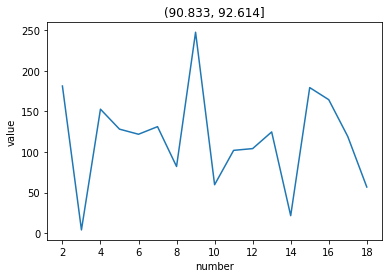

In [122]:
for j, i in results_mod.groupby("avg_elec_price_bin"):
    if not i.empty:
        sns.lineplot(data=i, x='number',y='value')
        plt.title(j)
        plt.show()
        plt.close()


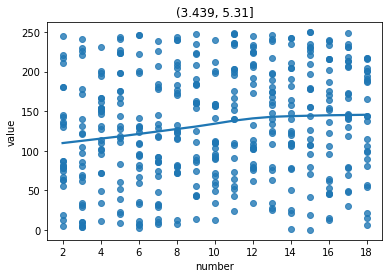

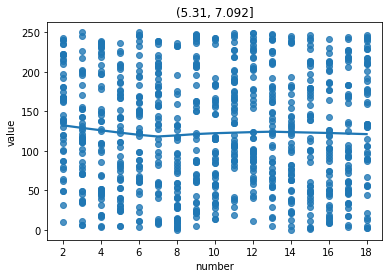

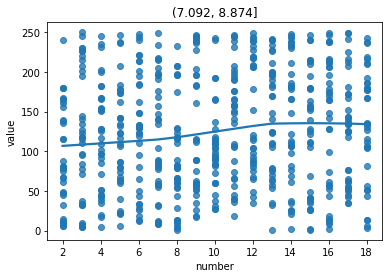

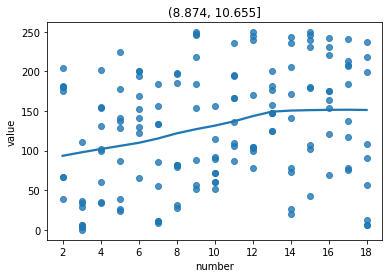

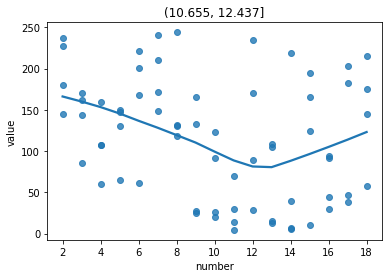

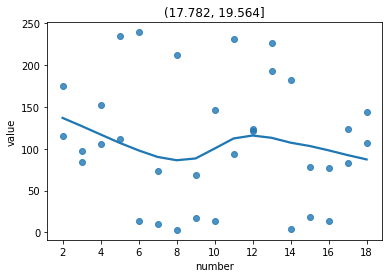

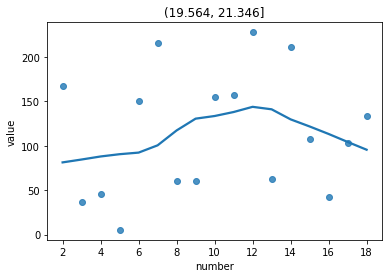

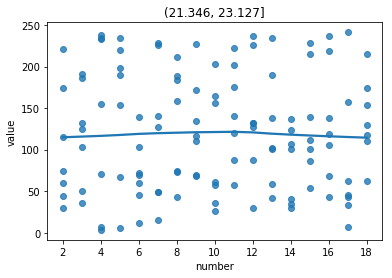

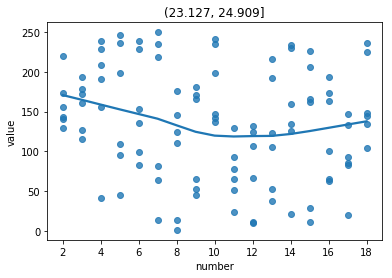

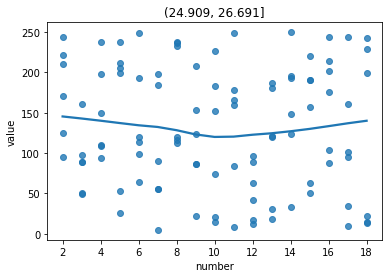

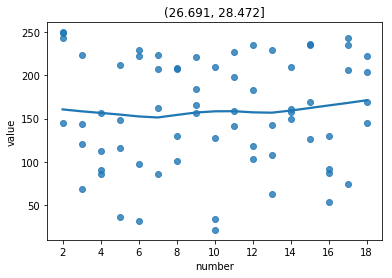

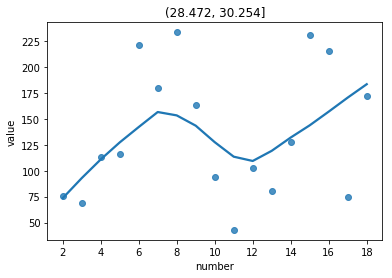

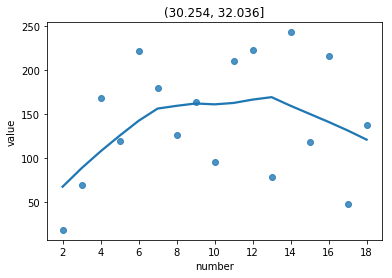

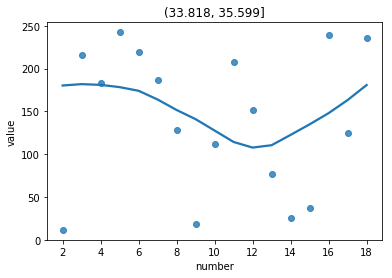

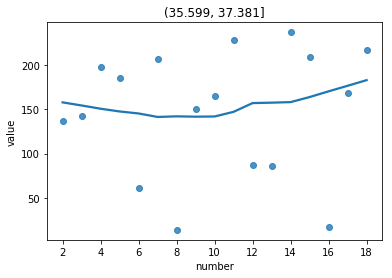

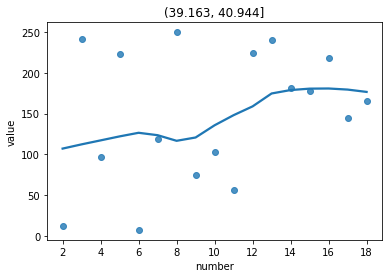

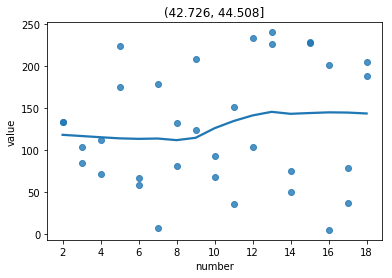

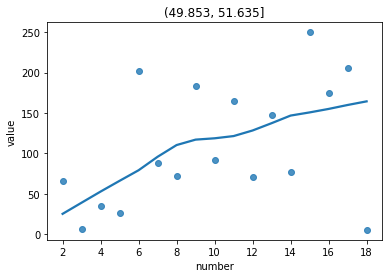

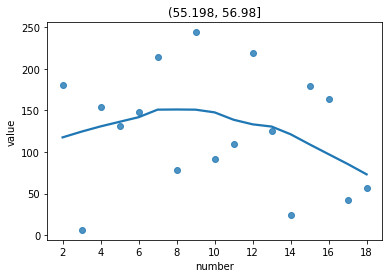

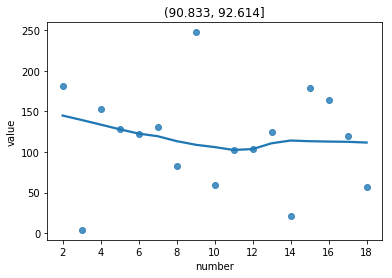

In [123]:
for j, i in results_mod.groupby("avg_elec_price_bin"):
    if not i.empty:
        sns.regplot(data=i, x='number',y='value', lowess=True)
        plt.title(j)
        plt.show()
        plt.close()

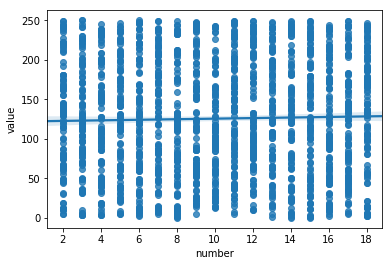

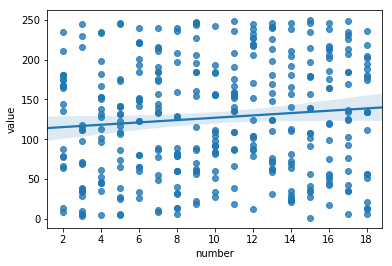

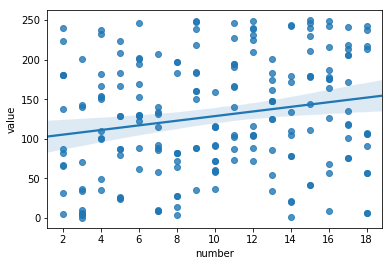

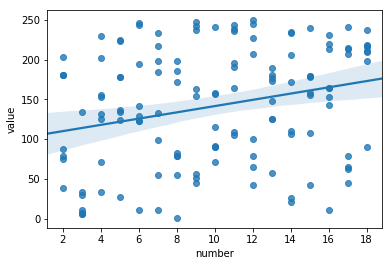

In [124]:
for j, i in results_mod.groupby('run_number'):
    sns.regplot(data=i, x='number',y='value')
    plt.show()
    plt.close()

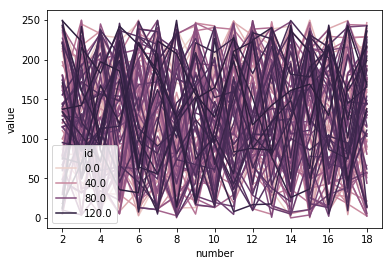

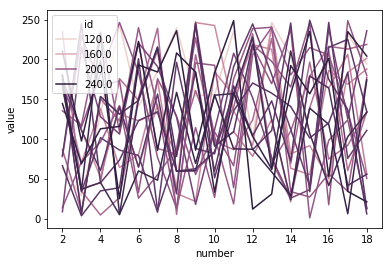

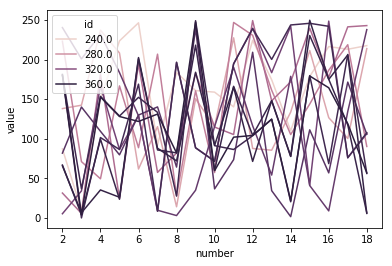

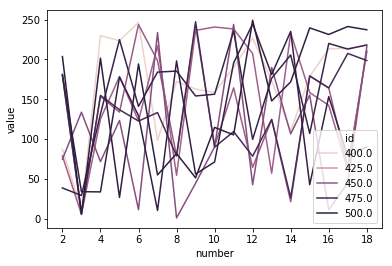

In [125]:
for j, i in results_mod.groupby('run_number'):
    sns.lineplot(data=i, x='number',y='value', hue='id')
    plt.show()
    plt.close()